# "A data-driven biology-based network model reproduces C. elegans premotor neural dynamics" figure bookmarks

### [Results -> Model validation -> Switching dynamics -> Figure 3](#Figure-3)

### [Results -> Analysis -> Gap junctions versus synaptic connections -> Figure 4](#Figure-4)

### [Results -> Analysis -> Replicating the impact of heat shock -> Figure 8](#Figure-8)

### [Results -> Analysis -> Behavior over long durations: roaming vs dwelling -> Figure 9](#Figure-9)


### Run many simulations and compute higher order stats, test with and without EJ and Syn

In [1]:
curdir = pwd()
dir_one_up = abspath(joinpath(curdir, ".."))

"/Users/mmtre/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Github repos/Celegans_premotor/"

In [2]:
using DifferentialEquations
using Statistics

using LinearAlgebra
using Plots
using Statistics
using SparseArrays

using JSON
using LinearAlgebra
using SavitzkyGolay
using Plots
using LaTeXStrings

using StatsPlots
using Statistics

using DataInterpolations

using SciMLBase
using OrdinaryDiffEq

##########################
### set font defaults ####
##########################
plot_font = "Computer Modern"

default(
    fontfamily=plot_font,
    titlefontsize = 11,
    labelfontsize = 9,
    linewidth=2, 
    framestyle=:nothing, 
    label=nothing, 
    grid=true
)

In [3]:
#################################
#### load saved functions  ######
#################################

filename = "functions_regression.jl"
data_folder = "functions"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
include(filepath)

#include("functions/functions_regression.jl")
######### contains functions .. #########
## RELU
## Data_Replacement

filename = "functions_simulation.jl"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
include(filepath)

#include("functions/functions_simulation.jl")
######### contains functions .. #########
## lorenz!
## moving_average
## heaviside_pulse


heaviside_pulse (generic function with 1 method)

## load processed White graph data

In [4]:
using DataFrames
using CSV

data_folder = "data/White_data_processed"
filename = "df5.csv"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);
df5 = DataFrame(CSV.File(filepath));

############################################
### take processed data from White #########
############################################

out_set = collect(Set(df5[!, :"Neuron2"]))
in_set = collect(Set(df5[!, :"Neuron1"]))
final_neurons = union(out_set, in_set)
N = size(final_neurons)[1]  ## number of neurons in my model
final_neuron_dict = Dict(zip(final_neurons, collect(1:N)))

#############################
### make EJ matrix ##########
#############################
df_EJ = filter(row -> row."Type" == "EJ",df5) # df_subset
EJ_mat = zeros(N,N)
for i in collect(1:size(df_EJ,1))
    w_tmp = df_EJ[i,:]["Nbr"]
    neuro1 = df_EJ[i,:]["Neuron1"]
    neuro2 = df_EJ[i,:]["Neuron2"]
    id1 = final_neuron_dict[neuro1]
    id2 = final_neuron_dict[neuro2]
    EJ_mat[id1, id2] = w_tmp
end

#############################
### make Syn matrix #########
#############################
df_S = filter(row -> row."Type" == "S",df5) # df_subset
S_mat = zeros(N,N)

for i in collect(1:size(df_S,1))
    w_tmp = df_S[i,:]["Nbr"]
    neuro1 = df_S[i,:]["Neuron1"]
    neuro2 = df_S[i,:]["Neuron2"]
    id1 = final_neuron_dict[neuro1]
    id2 = final_neuron_dict[neuro2]
    S_mat[id1, id2] = w_tmp
end

S_mat = S_mat'; # transpose for matrix multiplication
S_mat_bool = S_mat .!=0;

## Simulate core neurons using avg regression weights
### (avg weights computed from compute_avg_weights.ipynb)

In [5]:
using JLD2

data_folder = "data/model_weights"
filename = "avg_model_weights.jld2"
filepath = joinpath(joinpath(dir_one_up, data_folder), filename);


#@save filepath A_10takes_avg d_10takes_avg
@load filepath A_10takes_avg d_10takes_avg


2-element Vector{Symbol}:
 :A_10takes_avg
 :d_10takes_avg

### finds highly correlated neurons

In [6]:
#include("make_switchout_list.jl")
######### contains .. #########
## computes list of "highly_correlated_neurons"
## makes "switchout_list"


##########################################
### find higherly correlated neurons,  ###
### use these neurons as candidate     ###
### replacements when neuron is missing ##
##########################################

data_folder = "data/Atanas_data"

fn1 = "2023-03-07-01.json"
fn2 = "2023-01-23-21.json"
fn3 = "2023-01-23-15.json"  # avb (use for test?)
fn4 = "2023-01-19-22.json"
fn5 = "2023-01-19-15.json" # avb
fn6 = "2023-01-19-08.json" # avb
fn7 = "2023-01-19-01.json" # avb
fn8 = "2023-01-17-14.json"
fn9 = "2023-01-17-07.json"
fn10 = "2023-01-16-22.json" #avb, heat
fn11 = "2023-01-16-15.json"
fn12 = "2023-01-16-08.json" #avb, heat
fn13 = "2023-01-10-14.json" #avb, heat  (use this for plot example!)
fn14= "2023-01-10-07.json"  #avb, heat
fn15 = "2023-01-09-28.json"
fn16 = "2023-01-09-22.json"
fn17 = "2023-01-09-15.json"
fn18 = "2023-01-09-08.json" #avb, heat
fn19 = "2023-01-06-15.json"
fn20 = "2023-01-06-08.json"
fn21 = "2023-01-06-01.json"
fn22 = "2023-01-05-18.json" #avb, heat
fn23 = "2023-01-05-01.json"
fn24 = "2022-12-21-06.json"
fn25 = "2022-08-02-01.json"
fn26 = "2022-07-20-01.json"
fn27 = "2022-06-28-07.json"
fn28= "2022-06-28-01.json"
fn29 = "2022-06-14-13.json"
fn30 = "2022-06-14-07.json"

all_filenames = [fn1, fn2, fn3, # skip fn3
     fn4, fn5, fn6, fn7, fn8, fn9, fn10,
                fn11, fn12, fn13,  
    fn14, fn15, fn16, fn17, fn18, fn19, fn20,
                fn21, fn22, fn23, fn24, fn25, fn26, fn27, fn28, fn29, fn30]

num_files = size(all_filenames)[1]

cor_store = zeros(N, num_files)
fname_counter = 1

for fname in all_filenames
    filepath1 = joinpath(joinpath(dir_one_up, data_folder), fname);
    Fdata1 = JSON.parsefile(filepath1)
    labs = Fdata1["labeled"]
    Fts1 = Fdata1["trace_array"]
    key_set = keys(labs)
    Dict_nms = Dict{String,Int}()
    for ky in key_set
        Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
    end
    names_have = keys(Dict_nms);
    
    i = 1 # counter
    for nm in final_neurons
        ## get two L/R ts to compare ##
        if nm in(names_have)
            ts_tmp1 = Fts1[Dict_nms[nm]]  
            ###### normal length 4 neurons #######
            if length(nm) == 4
                nm_new = [] # put new name in
                if string(nm[4]) == "L"
                    nm_new = string(nm[1:3])*string("R")
                elseif string(nm[4]) == "R"
                    nm_new = string(nm[1:3])*string("L")
                end
                if nm_new in(names_have)
                    #println(nm_new)
                    ts_tmp2 = Fts1[Dict_nms[nm_new]]
                    cor_tmp = cor(ts_tmp1, ts_tmp2) ## compute corelation between two timeseries
                    cor_store[i,fname_counter] = cor_tmp ## put correlation in storage
                end
            end
            ###### end length 4 neurons #######
            ###### length 5 neurons #######
            if length(nm) == 5
                nm_new = [] # put new name in
                if string(nm[5]) == "L"
                    nm_new = string(nm[1:4])*string("R")
                elseif string(nm[5]) == "R"
                    nm_new = string(nm[1:4])*string("L")
                end
                if nm_new in(names_have)
                    #println(nm_new)
                    ts_tmp2 = Fts1[Dict_nms[nm_new]]
                    cor_tmp = cor(ts_tmp1, ts_tmp2) ## compute corelation between two timeseries
                    cor_store[i,fname_counter] = cor_tmp ## put correlation in storage
                end
            end
            ###### end length 5 neurons #######
        end
        i+=1 
    end
    fname_counter+=1
end

cor_mean_list = zeros(N)
for i in collect(1:N)
    tmp_row = cor_store[i,:]
    if sum(tmp_row) !=0
        idx_tmp = findall(tmp_row.!=0)
        cor_vals_tmp = tmp_row[idx_tmp]
        cor_mean_list[i]=mean(cor_vals_tmp)
    end
end

###############################################
## final list of highly correlated neurons ####
###############################################
highly_correlated_neurons = final_neurons[findall(cor_mean_list.>0.7)]; # 75

##########################################################
## use this list and "AVB" pair to make substitutions ####
##########################################################

switchout_list = append!(["AVBL", "AVBR"], highly_correlated_neurons);


# simulate premotor dynamics, many simulations

Bookmark many_simulations <a name='many_simulations' />

## ODE

old version dxdt = -10*(u-fp1)(u-fp2)(u-fp3) + d + 7*Syn + 50* EJ

In [7]:
###########################
###### ODE function #######
###########################
function lorenz!(du,u,p,t)
    γ, β, τ = p
    #### get the current signal ####
    usig_tmp = []
    for j in collect(1:Nsignals)
        append!(usig_tmp,Dsigs_interp[j](t))
    end
    
    #### put both the intrinsic and signal into single vector ####
    utmp = zeros(Ncore)
    utmp[ids_intrinsic] = u  #put in current intrinsic timepoints
    utmp[ids_signal] = usig_tmp
    du_tmp = zeros(Ncore)
    ublockT = transpose(repeat(utmp, 1, Ncore))
    ublock = repeat(utmp, 1, Ncore)
    #A_u = A*u
    A_RELUu = A*Relu.(utmp) # use instead of A_u
    W_u = diag(W*(ublock - ublockT))
    for j in collect(1:Ncore)
        ########### divide by global timescale variable tau ############
         du_tmp[j] = (1/τ)*(a*(utmp[j].-fp1).*(utmp[j].-fp2).*(utmp[j].-fp3) + d[j] + γ*A_RELUu[j] + β*W_u[j]) # fps version
    end
    
    du_tmp = du_tmp[ids_intrinsic]  # JUST output the derivative for the intrinsic neurons!
    for j in collect(1:Nintrinsic)
        #du[j] = -1*u[j] + Dsigs_interp[j](t)
        du[j] = du_tmp[j]
    end
end

lorenz! (generic function with 1 method)

### simulation setup data

In [8]:
###############################################
## use all of these for PLOS comp bio  ########
###############################################
#fn = "2023-01-09-08.json"  # USE THIS for PLOS comp bio
#fn = "2023-01-10-07.json"  # USE THIS for PLOS comp bio
#fn = "2023-01-23-21.json" # USE THIS for PLOS comp bio
#fn = "2023-01-05-01.json"  # USE THIS for PLOS comp bio
#fn = "2023-01-09-15.json"  # USE THIS for PLOS comp bio 
#fn = "2023-01-09-22.json"   # USE THIS for PLOS comp bio 

#####  main dataset  ########
fn = "2023-01-23-15.json"  
date_string =fn[1:13]
################################

data_folder = "data/Atanas_data"
filepath1 = joinpath(joinpath(dir_one_up, data_folder), fn); # make sure and change this!
Fdata1 = JSON.parsefile(filepath1)
labs = Fdata1["labeled"]
Fts1 = Fdata1["trace_array"]
dt = round(Fdata1["avg_timestep"]; digits = 3)
dFts1dt = copy(0*Fts1)

#####################################
## point where heat is turned on ####
#####################################
## will give error, no events found if no heat ##
#heat_pt = Fdata1["events"]["heat"][1]


#########################
####  smooth data  ######
#########################
for i in collect(1:size(Fts1)[1])
    ts_tmp = savitzky_golay(Fts1[i], 11, 5).y;
    #ts_tmp = savitzky_golay(Fts1[i], 21, 7).y;
    ts_tmp_chop1 = ts_tmp[3:end]
    ts_tmp_chop2 = ts_tmp[1:end-2]
    dts_dt_tmp = (ts_tmp_chop1 - ts_tmp_chop2)/(2*dt)
    ts_tmp_mid = ts_tmp[2:end-1]
    Fts1[i] = ts_tmp_mid
    dFts1dt[i] = dts_dt_tmp
end
key_set = keys(labs)
Dict_nms = Dict{String,Int}()
for ky in key_set
    Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
end
names_have = keys(Dict_nms);
ts_len = size(Fts1[1])[1]

#########################################################################################################
### Go though list of model neurons, see what model neurons there are timeseries for and collect ts #####
#########################################################################################################
ts_myneuros = zeros(N,ts_len)
dtsdt_myneuros = zeros(N,ts_len)

##################
##################

i = 1 # counter
for nm in final_neurons
    if nm in(names_have)
        ts_myneuros[i,:] = Fts1[Dict_nms[nm]]  
        dtsdt_myneuros[i,:] = dFts1dt[Dict_nms[nm]]      
    ###############################
    ## ADD in DATA REPLACEMENT ##
    ##############################
    else
        #Data_Replacement(nm)
        Data_Replacement(i, nm, names_have, switchout_list, Dict_nms, ts_myneuros, dtsdt_myneuros, Fts1, dFts1dt)
    end
    i+=1 # move on to the next row
end


##########################
## Pre for regression ####
##########################
D = copy(ts_myneuros)  # timeseries of all neurons in order of "final_neurons" (many rows zero, no data for them)
dDdt = copy(dtsdt_myneuros)  # derivative timeseries

##########################
#### get short D matrix ##
##########################
row_sum = sum(D, dims = 2)
idxfull_list = Int64[]
for i in collect(1:size(row_sum)[1])
    if row_sum[i] != 0
        append!(idxfull_list, i)  # get index of nonzero rows (aka final_neurons that have a timeseries)
    end  
end

Dshort = D[idxfull_list,:] # only the rows with nonzero timeseries
dDdtshort = dDdt[idxfull_list,:]  # only the rows with nonzero timeseries

println("num neurons ts = ", size(idxfull_list)[1]) # number of final_neurons that have a timeseries

##################################################
## get submatrices with only core (ts) neurons ###
##################################################
EJ_mat_short = EJ_mat[idxfull_list,idxfull_list]
S_mat_short = S_mat[idxfull_list,idxfull_list]
N_short = size(idxfull_list)[1]

#########################################################
## core neurons - named and timeseries - short block ####
#########################################################
core_neurons = final_neurons[idxfull_list]  # core neurons are all neurons with ts for current dataset
Ncore = size(core_neurons)[1]
ids_core = []
for i in collect(1:Ncore)
    append!(ids_core, final_neuron_dict[core_neurons[i]])
end
Dcore = D[ids_core,:]
dDdtcore = dDdt[ids_core,:]
core_neurons_dict = Dict(zip(core_neurons, collect(1:Ncore)));

##################################
## put in regressed Syn signs ####
##################################
S_approx = A_10takes_avg # use the average for 30 datasets
d_approx = d_10takes_avg; # use the average for 30 datasets



switchout SMBDL
switchout AVBR
AVBL
switchout RIBR
RIBL
switchout AVKR
switchout AVKL
switchout SMBVL
switchout SMBVR
switchout BAGL
switchout SMBDR
switchout BAGR
num neurons ts = 84


### run simulation

In [9]:
######################
###  PARAMETERS  ####
######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2    #  a = -2
γ = 1.4   #  γ = 1.4  
β = 10    #  β = 10 
τ = 0.2   #  τ = 0.1

####### OLD set, produces figures in current draft ######
# a = -10  # a = -2
# γ = 7     # γ = 1.4  
# β = 50    # β = 10 
# τ = 1


d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]

######################
######################

##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)

############################
#####  complete set  #######
############################
intrinsic_neurons = ["AVBL","AVBR","RIBL","RIBR","RID", "AVDL", "AVDR",
    "AVAL", "AVAR", "RIML", "RIMR",
"AVEL","AVER","AIBL","AIBR"]

clrsp = palette(:batlow10)
clrs = [clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[5], clrsp[5],
    clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8]]

ids_intrinsic = []
for i in collect(1:size(intrinsic_neurons)[1])
    append!(ids_intrinsic,core_neurons_dict[intrinsic_neurons[i]])
end
Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]

##########
#########
### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]
Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition


#####################################
## point where heat is turned on ####
#####################################
## will give error, no events found if no heat ##
#heat_pt = Fdata1["events"]["heat"][1]

##### Heat time ####
#heat_time = dt*(heat_pt-tstart)
####################

num_steps = 1400 
t_short = dt*collect(0:num_steps)

####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

tspan = (0.0,t_short[end])  # timespan for the ode

#######################################
## both synaptic and EJ connections ###
#######################################

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn = solve(prob,Tsit5(), saveat=t_short);




# Figure 3

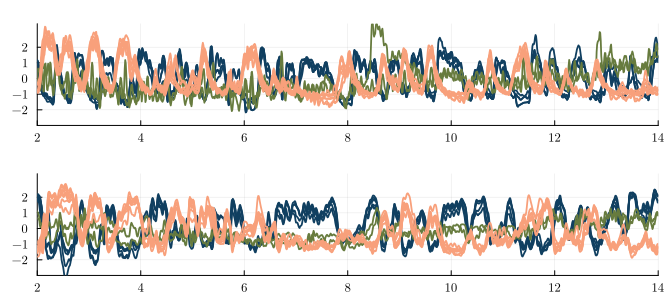

"figures/simulations/sim_data_match/sim_2023-01-23-15.pdf"

In [10]:
################################################
## plot results of simulation versus data  #####
################################################

t_id_st = 201  # time to start plot
########################
#### plot real TS ######
########################
p1 = plot(title = " ",ytick = -2:1:2, xlim = (time_vec[t_id_st],14), ylim = (-3,3.5))
for i in 1:size(Dintrinsic,1)
    plot!(time_vec[t_id_st:num_steps+1], Dintrinsic[i,t_id_st:num_steps+1], label = false, color = clrs[i], linewidth = 1.8) #label = intrinsic_neurons[i]
end

#p1 = vline!([heat_time], color = :red, linestyle = :dash, linewidth = 2.5, label = :none)

########################
#### plot simulation ######
########################
p2 = plot(title = " ",ytick = -2:1:2, xlim = (time_vec[t_id_st],14), ylim = (-3,3.5))
for i in collect(1:Nintrinsic)
    #plot!(sol_EJ_Syn.t,sol_EJ_Syn[i,:], label = false, color = clrs[i], linewidth = 1.8)
plot!(sol_EJ_Syn.t[t_id_st:end], sol_EJ_Syn[i,t_id_st:end], label = false, color = clrs[i], linewidth = 1.8)
end

######################################################
### Behavioral timeseries of data and simulation #####
######################################################

F_data_ts = mean(Dintrinsic[1:5,1:num_steps+1],dims = 1)
R_data_ts = mean(Dintrinsic[8:13,1:num_steps+1],dims = 1)

thresh = 0.5

z_data_ts = F_data_ts - R_data_ts
z_data_ts[z_data_ts.> thresh] .= 1
z_data_ts[z_data_ts.< -thresh] .= -1
z_data_ts[(z_data_ts .> -thresh).*(z_data_ts .< thresh)] .=0
behav_ts = sign.(z_data_ts)


F_sim_ts = mean(sol_EJ_Syn[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0
behav_ts_sim = sign.(z_sim_ts)
######################################################
######################################################


######################################################
####  save simulation !!!!!!  ####
######################################################

# name = string("sim_", date_string, ".pdf")  # date_string comes from dataset pulled
# path = "figures/simulations/"
# path_and_name = string(path, name)

pall = plot(p1,p2, layout = (2,1), size = (670,300))  #size = (470,300)  #size = (470,330) # size = (700,330), #size = (700,300)

display(pall)
# savefig(pall, path_and_name) # ava plot

############################################################################
####  save MAIN timeseries  (higher order stats based on this)   ####
##########################################################################

name = string("sim_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/sim_data_match/"
path_and_name = string(path, name)
#savefig(pall,path_and_name) # behav ts plot

############################################################################
####  save experiments with different parameters (vary tau and gamma)  #####
############################################################################

# pall = plot(p1,p2, layout = (2,1), size = (700,330)) #size = (700,300)
# name = string("sim_","params_","gamma=",γ,"_tau=",τ,".pdf")  # date_string comes from dataset pulled
# path = "figures/simulations/vary_parameters/"
# path_and_name = string(path, name)

# savefig(pall,path_and_name) # neuron ts plot

## behavioral ts

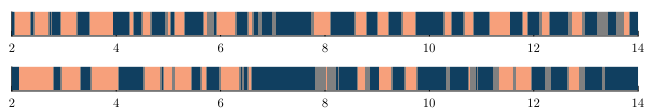

"figures/simulations/sim_data_match/behav_ts_2023-01-23-15.pdf"

In [11]:
######### Make ambiguous regions grey ##########
c1 = palette(:batlow10)|> collect
c1 = c1[2:8]
c1[3] = :grey
c1[4] = :grey

p1 = plot(heatmap(time_vec[t_id_st:num_steps+1],[1],-1*behav_ts[:,t_id_st:num_steps+1],c =c1, clim = (-1,1), xlim = (time_vec[t_id_st],14), ytick = false, legend=:none), size = (500,100)) # size = (700,100)
#p1 = vline!([heat_time], color = :red, linestyle = :dash, linewidth = 3, label = :none)


p2 = plot(heatmap(time_vec[t_id_st:num_steps+1], [1], -1*behav_ts_sim[:,t_id_st:num_steps+1], c = c1, clim = (-1,1), xlim = (time_vec[t_id_st],14), ytick = false, legend=:none), size = (500,100)) #size = (700,100)

pall = plot(p1,p2, layout = (2,1), size = (650,110))  #size = (675,110)
display(pall)

name = string("behav_ts_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/sim_data_match/"
path_and_name = string(path, name)

#savefig(pall,path_and_name) # behav ts plot


## Higher-order stats on simulation,  fn = "2023-01-23-15.json"

Bookmark higher_order_stats <a name='higher_order_stats' />

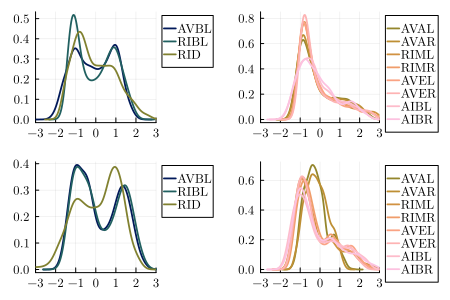

"figures/simulations/higher_order_stats/pdfs_2023-01-23-15.pdf"

In [12]:
#intrinsic_neurons

#ids_intrinsic

# clrs = palette(:batlow10)
# clrs2 = palette(:batlow10)
# clrs = clrs[[1,3,5,7,9]]

clrs = palette(:batlow25)
clrs_F = clrs[[1,4,7,10,13]]  ## AVB clr set ##
clrs_R = clrs[[14,16,17,19, 20, 22,23,24]]  ## AVA clr set ##
    

p1 = density(Dcore[core_neurons_dict["AVBL"],t_id_st:num_steps+1], label="AVBL", xlim = (-3,3),
    legend=:outertopright, linewidth = 1.8, color = clrs_F[1])
p1 = density!(Dcore[core_neurons_dict["RIBL"],t_id_st:num_steps+1], label = "RIBL", linewidth = 1.8, color = clrs_F[3])
p1 = density!(Dcore[core_neurons_dict["RID"],t_id_st:num_steps+1], label = "RID", linewidth = 1.8, color = clrs_F[5])

# p2 = density(Dcore[core_neurons_dict["AVDL"],:], label = "AVDL", linewidth = 1.8, color = clrs[1])
# p2 = density!(Dcore[core_neurons_dict["AVDR"],:], label = "AVDR", linewidth = 1.8, color = clrs[5])

p3 = density(Dcore[core_neurons_dict["AVAL"],t_id_st:num_steps+1], label = "AVAL", xlim = (-3,3), 
    legend=:outertopright, linewidth = 1.8, color = clrs_R[1])
p3 = density!(Dcore[core_neurons_dict["AVAR"],t_id_st:num_steps+1], label = "AVAR", linewidth = 1.8, color = clrs_R[2])
p3 = density!(Dcore[core_neurons_dict["RIML"],t_id_st:num_steps+1], label = "RIML", linewidth = 1.8, color = clrs_R[3])
p3 = density!(Dcore[core_neurons_dict["RIMR"],t_id_st:num_steps+1], label = "RIMR", linewidth = 1.8, color = clrs_R[4])
p3 = density!(Dcore[core_neurons_dict["AVEL"],t_id_st:num_steps+1], label = "AVEL", linewidth = 1.8, color = clrs_R[5])
p3 = density!(Dcore[core_neurons_dict["AVER"],t_id_st:num_steps+1], label = "AVER", linewidth = 1.8, color = clrs_R[6])
p3 = density!(Dcore[core_neurons_dict["AIBL"],t_id_st:num_steps+1], label = "AIBL", linewidth = 1.8, color = clrs_R[7])
p3 = density!(Dcore[core_neurons_dict["AIBR"],t_id_st:num_steps+1], label = "AIBR", linewidth = 1.8, color = clrs_R[8])

# p3 = density(Dcore[core_neurons_dict["ASHL"],:], label = "ASHL")
# p3 = density!(Dcore[core_neurons_dict["URXL"],:], label = "URXL")
# p3 = density!(Dcore[core_neurons_dict["FLPL"],:], label = "FLPL")
# p3 = density!(Dcore[core_neurons_dict["AQR"],:], label = "AQR")

p4 = density(sol_EJ_Syn[1,t_id_st:num_steps+1], label="AVBL", xlim = (-3,3), legend=:outertopright, linewidth = 1.8, color = clrs_F[1])
p4 = density!(sol_EJ_Syn[2,t_id_st:num_steps+1], label="RIBL", linewidth = 1.8, color = clrs_F[3])
p4 = density!(sol_EJ_Syn[3,t_id_st:num_steps+1], label="RID", linewidth = 1.8, color = clrs_F[5])


# p5 = density(sol_EJ_Syn[4,:], label="AVDL", linewidth = 1.8, color = clrs[1])
# p5 = density!(sol_EJ_Syn[5,:], label="AVDR", linewidth = 1.8, color = clrs[5])

p6 = density(sol_EJ_Syn[6,t_id_st:num_steps+1], label="AVAL", xlim = (-3,3), legend=:outertopright, linewidth = 1.8, color = clrs_R[1])
p6 = density!(sol_EJ_Syn[7,t_id_st:num_steps+1], label="AVAR", linewidth = 1.8, color = clrs_R[2])
p6 = density!(sol_EJ_Syn[8,t_id_st:num_steps+1], label="RIML", linewidth = 1.8, color = clrs_R[3])
p6 = density!(sol_EJ_Syn[9,t_id_st:num_steps+1], label="RIMR", linewidth = 1.8, color = clrs_R[4])
p6 = density!(sol_EJ_Syn[10,t_id_st:num_steps+1], label="AVEL", linewidth = 1.8, color = clrs_R[5])
p6 = density!(sol_EJ_Syn[11,t_id_st:num_steps+1], label="AVER", linewidth = 1.8, color = clrs_R[6])
p6 = density!(sol_EJ_Syn[12,t_id_st:num_steps+1], label="AIBL", linewidth = 1.8, color = clrs_R[7])
p6 = density!(sol_EJ_Syn[13,t_id_st:num_steps+1], label="AIBR", linewidth = 1.8, color = clrs_R[8])

pall = plot(p1,p3,p4, p6, layout = (2,2), size = (450,300))  # size = (800,300)
display(pall)

name = string("pdfs_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/higher_order_stats/"
path_and_name = string(path, name)
#savefig(pall,path_and_name) # behav ts plot


In [13]:
using Colors
using Plots

# Define the color array
#color_array = ["785964","856b72","917d80","9e8f8e","aaa19c","b7b2ab","c3c4b9","d0d6c7","dce8d5","e9fae3"]

color_array = ["160c28","2d2539","433f4b","5a585c","70716d","878b7f","9da490","b4bda1","cad7b3","e1f0c4"]

# Convert hexadecimal colors to RGB colors
rgb_colors = [parse(RGB, "#" * color) for color in color_array]

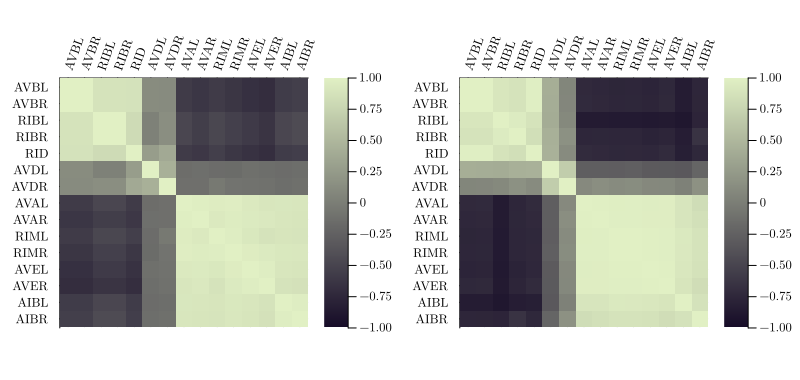

"figures/simulations/higher_order_stats/corr_2023-01-23-15.svg"

In [14]:
#####################################
#####  correlation matrices   #######
#####################################
cor_mat = cor(Dcore[ids_intrinsic,t_id_st:num_steps+1]')

p1 = plot(heatmap(intrinsic_neurons,intrinsic_neurons,cor_mat, 
                c =rgb_colors,
aspect_ratio=:equal,
            yflip = true,
            xrotation = 70,
            xmirror = true, clim = (-1,1)))


p2 =plot(heatmap(intrinsic_neurons, intrinsic_neurons,cor(sol_EJ_Syn[:,t_id_st:num_steps+1]'),
            c =rgb_colors,
aspect_ratio=:equal,
            yflip = true,
            xrotation = 70,
            xmirror = true, clim = (-1,1)))

pall = plot(p1, p2, layout = (1,2), size = (800,380))
display(pall)

#name = string("corr_", date_string, ".pdf")  # date_string comes from dataset pulled, save as .pdf
name = string("corr_", date_string, ".svg")  # date_string comes from dataset pulled, save as .eps
path = "figures/simulations/higher_order_stats/"
path_and_name = string(path, name)
#savefig(pall,path_and_name) # behav ts plot

## Histograms of dwell times

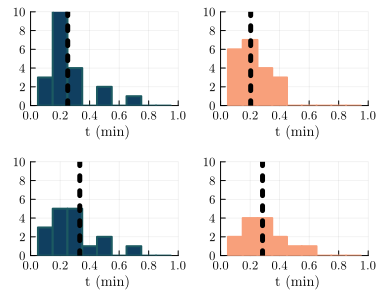

data F = 0.25173913043478263
sim F = 0.3333333333333333
data R = 0.20400000000000001
sim R = 0.2842857142857143


In [15]:
## function that counts the number of repeats in a list
function count_repeat_ones(arr::AbstractArray{Int})
    repeat_lengths = Int[]

    count = 0
    for i in 1:length(arr)
        if arr[i] == 1
            count += 1
        elseif count > 0
            push!(repeat_lengths, count)
            count = 0
        end
    end

    if count > 0
        push!(repeat_lengths, count)
    end

    return repeat_lengths
end

mint = 3/60
# t_id_st = 201  # time to start plot, make sure this is the same as above!
# num_steps = 1400 # make sure this is the same as above!

rev_ts = Int.(vec(behav_ts[t_id_st:num_steps+1].<0))
for_ts = Int.(vec(behav_ts[t_id_st:num_steps+1].>0))

rev_ts_sim = Int.(vec(behav_ts_sim[t_id_st:num_steps+1].<0))
for_ts_sim = Int.(vec(behav_ts_sim[t_id_st:num_steps+1].>0))

dwell_times_data_R = dt*count_repeat_ones(rev_ts)
dwell_times_data_R = dwell_times_data_R[dwell_times_data_R.> mint]

dwell_times_data_F = dt*count_repeat_ones(for_ts)
dwell_times_data_F = dwell_times_data_F[dwell_times_data_F.> mint]

dwell_times_sim_R = dt*count_repeat_ones(rev_ts_sim)
dwell_times_sim_R = dwell_times_sim_R[dwell_times_sim_R.> mint]

dwell_times_sim_F = dt*count_repeat_ones(for_ts_sim)
dwell_times_sim_F = dwell_times_sim_F[dwell_times_sim_F.> mint]

#######################################################
#######################################################
#########        FINAL FIG          ###################
#######################################################
#######################################################

#######################################################
########    histograms of switch times  ###############
#######################################################
clrsp = palette(:batlow10)

x_max = 1.0  # 1.3 for 2023-01-23-15.json

p1 = histogram(dwell_times_data_F, bins = mint:0.1:x_max, xticks = 0:0.2:x_max, xlabel = " t (min)", color = clrsp[2],  linecolor = clrsp[3], 
    xlim = (0,x_max), ylim = (0,10), legend = false) # ylabel = "freq", title = "data F", ylim = (0,13)
p1 = vline!([mean(dwell_times_data_F)], linestyle =:dot, linewidth = 5, color = "black")

p2 = histogram(dwell_times_data_R, bins = mint:0.1:x_max, xticks = 0:0.2:x_max, xlabel = " t (min)", color = clrsp[8],  linecolor = clrsp[8], 
    xlim = (0,x_max), ylim = (0,10), legend = false)  # ylabel = "freq",  title = "data R",  ylim = (0,13)
p2 = vline!([mean(dwell_times_data_R)], linestyle =:dot, linewidth = 5, color = "black")

p3 = histogram(dwell_times_sim_F, bins = mint:0.1:x_max, xticks = 0:0.2:x_max, xlabel = " t (min)", color = clrsp[2],  linecolor = clrsp[3], 
    xlim = (0,x_max), ylim = (0,10), legend = false)  # ylabel = "freq", title = "sim F", ylim = (0,8)
p3 = vline!([mean(dwell_times_sim_F)], linestyle =:dot, linewidth = 5, color = "black")


p4 = histogram(dwell_times_sim_R, bins = mint:0.1:x_max, xticks = 0:0.2:x_max, xlabel = " t (min)", color = clrsp[8], linecolor = clrsp[8], 
    xlim = (0,x_max), ylim = (0,10), legend = false) # ylabel = "freq", title = "sim R", ylim = (0,8)
p4 = vline!([mean(dwell_times_sim_R)], linestyle =:dot, linewidth = 5, color = "black")

# p1 = histogram(wt_dxdt_F_intrinsic, bins = -5:4:80, title = "intrinsic")
# p2 = histogram(wt_dxdt_F2F, bins = 0:4:80, title = "FSyn")
# p3 = histogram(wt_dxdt_F_intrinsic + wt_dxdt_F2F, bins = -5:4:80, title = "both")

pall = plot(p1, p2, p3, p4, layout = (2,2), size = (380,300))  # size = (350,300)
display(pall)

name = string("hist_dwell_t_", date_string, ".pdf")
path = "figures/simulations/higher_order_stats/"
path_and_name = string(path, name)


#savefig(pall,path_and_name) # behav ts plot

println("data F = ", mean(dwell_times_data_F))
println("sim F = ", mean(dwell_times_sim_F))

println("data R = ", mean(dwell_times_data_R))
println("sim R = ", mean(dwell_times_sim_R))

## Make petri dish simulation

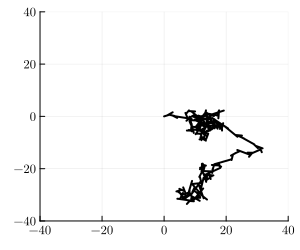

"figures/simulations/higher_order_stats/petri_sim_2023-01-23-15.pdf"

In [16]:

x0 = [0, 0]

nf = 200

x_vec = zeros(2,2*nf+1)
ct = 0
theta = 0

for i in range(1,nf)
    ct = ct+1
    # select an angle for turn
    ## select omega turn 0.35 or regular turn 0.65
    omega_reg = rand()
    
    if omega_reg < 0.35 # omega turn, pull from omega distribution
        delta_theta = pi*rand() + pi/2
    else  # regular turn, pull from regular distribution
        delta_theta = pi*rand() - pi/2
    end
    
    theta = theta + delta_theta
    
    # go foward
    tf = rand(dwell_times_data_F)
    tf = tf*60 # turn minutes to seconds
    speedf = 0.15 # mm/sec
    x = tf*speedf*cos(theta)
    y = tf*speedf*sin(theta)
    
    # compute location at end of foward run
    x_vec[:,ct+1] = x_vec[:,ct] + [x;y]
    ct = ct+1

    tr = rand(dwell_times_data_R)
    speedr = 0.075 #mm/sec 
    tr = tr*60 # turn minutes to seconds
    x = -tr*speedr*cos(theta)
    y = -tr*speedr*sin(theta)
    
    # compute location at end of reversal
    x_vec[:,ct+1] = x_vec[:,ct] + [x;y]
    
    #println(theta)
end

p1 = plot(x_vec[1,:], x_vec[2,:], c = :black, xlim =(-40,40), ylim = (-40,40), legend = false, size = (300,250)) #size = (250,150)
display(p1)
    
name = string("petri_sim_", date_string, ".pdf")
path = "figures/simulations/higher_order_stats/"
path_and_name = string(path, name)


#savefig(p1,path_and_name) # behav ts plot

## Petri dish sim, real path

In [17]:
#######################################
####  Define colors for pulse  ########
#######################################
color_array_pulse = ["7FD8BE","995d81", "758ECD", "FFD449", "E2C2FF"]
rgb_colors_pulse = [parse(RGB, "#" * color) for color in color_array_pulse]

## Locomotion simulation - DATA

In [18]:
#############################
###  pre-process data  ######
#############################
bts = behav_ts[:,t_id_st:num_steps+1]'
bts_seq = zeros(0)
append!(bts_seq,bts[1])

bts_count=zeros(0)
ct = 1

for i in range(2,length(bts))  # length(bts)
    if bts[i] != bts[i-1]
        append!(bts_seq, bts[i])
        append!(bts_count, ct)
        ct=1
    else
        ct = ct+1
    
    end
end
append!(bts_count, ct);

In [19]:
#############################
###  petri dish sim  ######
#############################

x0 = [0, 0]
x02 = [-20, 0]
x03 = [20, 0]
x_vec = zeros(2,length(bts_seq)+1)
x_vec2 = zeros(2,length(bts_seq)+1)
x_vec3 = zeros(2,length(bts_seq)+1)

x_vec2[:,1] = x02
x_vec3[:,1] = x03

theta = 0
theta2 = 0
theta3 = 0

for i in range(1,length(bts_seq))
    current_behav = bts_seq[i]
    
    if current_behav == 1  # forward
        # go foward
        tf = bts_count[i]*dt
        tf = tf*60 # turn minutes to seconds
        speedf = 0.15 # mm/sec
        # first path
        x = tf*speedf*cos(theta)
        y = tf*speedf*sin(theta)
        # compute location at end of foward run
        x_vec[:,i+1] = x_vec[:,i] + [x;y]
        
        # second path
        x2 = tf*speedf*cos(theta2)
        y2 = tf*speedf*sin(theta2)
        # compute location at end of foward run
        x_vec2[:,i+1] = x_vec2[:,i] + [x2;y2]
        
        # third path
        x3 = tf*speedf*cos(theta3)
        y3 = tf*speedf*sin(theta3)
        # compute location at end of foward run
        x_vec3[:,i+1] = x_vec3[:,i] + [x3;y3]
        
    elseif current_behav == -1  # reversal THEN TURN
        # go reversal
        tr = bts_count[i]*dt
        tr = tr*60 # turn minutes to seconds
        speedr = 0.075 #mm/sec 
        x = -tr*speedr*cos(theta)
        y = -tr*speedr*sin(theta)
        # compute location at end of reversal
        x_vec[:,i+1] = x_vec[:,i] + [x;y]
        
        # second path
        x2 = -tr*speedr*cos(theta2)
        y2 = -tr*speedr*sin(theta2)
        # compute location at end of reversal
        x_vec2[:,i+1] = x_vec2[:,i] + [x2;y2]
        
        # third path
        x3 = -tr*speedr*cos(theta3)
        y3 = -tr*speedr*sin(theta3)
        # compute location at end of reversal
        x_vec3[:,i+1] = x_vec3[:,i] + [x3;y3]
        
        # now turn
        # select an angle for turn
        ## select omega turn 0.35 or regular turn 0.65
        omega_reg = rand()
        if omega_reg < 0.35 # omega turn, pull from omega distribution
            delta_theta = pi*rand() + pi/2
        else  # regular turn, pull from regular distribution
            delta_theta = pi*rand() - pi/2
        end
        theta = theta + delta_theta
        
        # SECOND TURN
        # select an angle for turn
        ## select omega turn 0.35 or regular turn 0.65
        omega_reg2 = rand()
        if omega_reg2 < 0.35 # omega turn, pull from omega distribution
            delta_theta2 = pi*rand() + pi/2
        else  # regular turn, pull from regular distribution
            delta_theta2 = pi*rand() - pi/2
        end
        theta2 = theta2 + delta_theta2
        
        # THIRD TURN
        # select an angle for turn
        ## select omega turn 0.35 or regular turn 0.65
        omega_reg3 = rand()
        if omega_reg3 < 0.35 # omega turn, pull from omega distribution
            delta_theta3 = pi*rand() + pi/2
        else  # regular turn, pull from regular distribution
            delta_theta3 = pi*rand() - pi/2
        end
        theta3 = theta3 + delta_theta3
        
    else  # current_behav = 0, pause
        x_vec[:,i+1] = x_vec[:,i]
        x_vec2[:,i+1] = x_vec2[:,i]
        x_vec3[:,i+1] = x_vec3[:,i]
        
    end    
end        
        

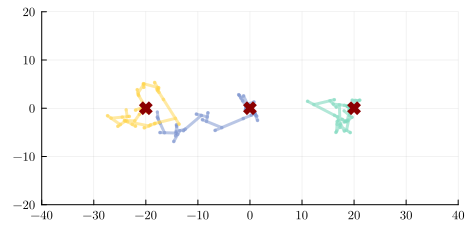

"figures/simulations/higher_order_stats/petri_data_2023-01-23-15.pdf"

In [20]:
p1 = scatter(x_vec[1,:], x_vec[2,:], c = rgb_colors_pulse[3], markersize = 2, legend = false, alpha = 0.3, markerstrokewidth=0,
        xlim =(-40,40), ylim = (-20,20), xticks = ([-40,-30,-20,-10,0,10,20,30,40]), size = (470,230)) #size = (250,150)



p1 = plot!(x_vec[1,:], x_vec[2,:], c = rgb_colors_pulse[3], alpha =0.5, linewidth = 3)


p1 = scatter!(x_vec2[1,:], x_vec2[2,:], c = rgb_colors_pulse[4], markersize = 2, legend = false, alpha = 0.3, markerstrokewidth=0) #size = (250,150)
p1 = plot!(x_vec2[1,:], x_vec2[2,:], c = rgb_colors_pulse[4], alpha =0.5, linewidth = 3) #size = (250,150)

p1 = scatter!(x_vec3[1,:], x_vec3[2,:], c = rgb_colors_pulse[1], markersize = 2, legend = false, alpha = 0.3, markerstrokewidth=0) #size = (2dur_short,1dur_short)
p1 = plot!(x_vec3[1,:], x_vec3[2,:], c = rgb_colors_pulse[1], alpha =0.6, linewidth = 3) #size = (250,150)

st_pts = hcat(x0, x02, x03)
p1 = scatter!(st_pts[1,:], st_pts[2,:], markershape= :xcross, markerstrokewidth = 12, markerstrokecolor=:red4, color = :red4, markersize = 5)

display(p1)
    
#name = string("petri_sim_", date_string, ".pdf")
name = string("petri_data_", date_string, ".pdf")
path = "figures/simulations/higher_order_stats/"
path_and_name = string(path, name)


#savefig(p1,path_and_name) # behav ts plot

## Locomotion simulation - SIMULATION

In [21]:
#############################
###  pre-process data  ######
#############################
bts = behav_ts_sim[:,t_id_st:num_steps+1]'
bts_seq = zeros(0)
append!(bts_seq,bts[1])

bts_count=zeros(0)
ct = 1

for i in range(2,length(bts))  # length(bts)
    if bts[i] != bts[i-1]
        append!(bts_seq, bts[i])
        append!(bts_count, ct)
        ct=1
    else
        ct = ct+1
    
    end
end
append!(bts_count, ct);

In [22]:
#############################
###  petri dish sim  ######
#############################

x0 = [0, 0]
x02 = [-20, 0]
x03 = [20, 0]
x_vec = zeros(2,length(bts_seq)+1)
x_vec2 = zeros(2,length(bts_seq)+1)
x_vec3 = zeros(2,length(bts_seq)+1)

x_vec2[:,1] = x02
x_vec3[:,1] = x03

theta = 0
theta2 = 0
theta3 = 0

for i in range(1,length(bts_seq))
    current_behav = bts_seq[i]
    
    if current_behav == 1  # forward
        # go foward
        tf = bts_count[i]*dt
        tf = tf*60 # turn minutes to seconds
        speedf = 0.15 # mm/sec
        # first path
        x = tf*speedf*cos(theta)
        y = tf*speedf*sin(theta)
        # compute location at end of foward run
        x_vec[:,i+1] = x_vec[:,i] + [x;y]
        
        # second path
        x2 = tf*speedf*cos(theta2)
        y2 = tf*speedf*sin(theta2)
        # compute location at end of foward run
        x_vec2[:,i+1] = x_vec2[:,i] + [x2;y2]
        
        # third path
        x3 = tf*speedf*cos(theta3)
        y3 = tf*speedf*sin(theta3)
        # compute location at end of foward run
        x_vec3[:,i+1] = x_vec3[:,i] + [x3;y3]
        
    elseif current_behav == -1  # reversal THEN TURN
        # go reversal
        tr = bts_count[i]*dt
        tr = tr*60 # turn minutes to seconds
        speedr = 0.075 #mm/sec 
        x = -tr*speedr*cos(theta)
        y = -tr*speedr*sin(theta)
        # compute location at end of reversal
        x_vec[:,i+1] = x_vec[:,i] + [x;y]
        
        # second path
        x2 = -tr*speedr*cos(theta2)
        y2 = -tr*speedr*sin(theta2)
        # compute location at end of reversal
        x_vec2[:,i+1] = x_vec2[:,i] + [x2;y2]
        
        # third path
        x3 = -tr*speedr*cos(theta3)
        y3 = -tr*speedr*sin(theta3)
        # compute location at end of reversal
        x_vec3[:,i+1] = x_vec3[:,i] + [x3;y3]
        
        # now turn
        # select an angle for turn
        ## select omega turn 0.35 or regular turn 0.65
        omega_reg = rand()
        if omega_reg < 0.35 # omega turn, pull from omega distribution
            delta_theta = pi*rand() + pi/2
        else  # regular turn, pull from regular distribution
            delta_theta = pi*rand() - pi/2
        end
        theta = theta + delta_theta
        
        # SECOND TURN
        # select an angle for turn
        ## select omega turn 0.35 or regular turn 0.65
        omega_reg2 = rand()
        if omega_reg2 < 0.35 # omega turn, pull from omega distribution
            delta_theta2 = pi*rand() + pi/2
        else  # regular turn, pull from regular distribution
            delta_theta2 = pi*rand() - pi/2
        end
        theta2 = theta2 + delta_theta2
        
        # THIRD TURN
        # select an angle for turn
        ## select omega turn 0.35 or regular turn 0.65
        omega_reg3 = rand()
        if omega_reg3 < 0.35 # omega turn, pull from omega distribution
            delta_theta3 = pi*rand() + pi/2
        else  # regular turn, pull from regular distribution
            delta_theta3 = pi*rand() - pi/2
        end
        theta3 = theta3 + delta_theta3
        
    else  # current_behav = 0, pause
        x_vec[:,i+1] = x_vec[:,i]
        x_vec2[:,i+1] = x_vec2[:,i]
        x_vec3[:,i+1] = x_vec3[:,i]
        
    end    
end        
        

# Figure 9

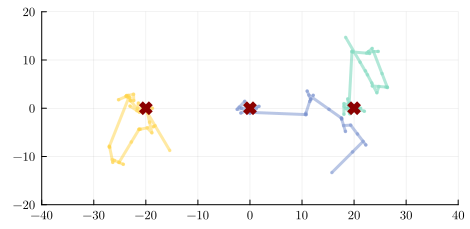

"figures/simulations/higher_order_stats/petri_sim_2023-01-23-15.pdf"

In [23]:
p1 = scatter(x_vec[1,:], x_vec[2,:], c = rgb_colors_pulse[3], markersize = 2, legend = false, alpha = 0.3, markerstrokewidth=0,
        xlim =(-40,40), ylim = (-20,20), xticks = ([-40,-30,-20,-10,0,10,20,30,40]), size = (470,230)) #size = (250,150)


p1 = plot!(x_vec[1,:], x_vec[2,:], c = rgb_colors_pulse[3], alpha =0.5, linewidth = 3)


p1 = scatter!(x_vec2[1,:], x_vec2[2,:], c = rgb_colors_pulse[4], markersize = 2, legend = false, alpha = 0.3, markerstrokewidth=0) #size = (250,150)
p1 = plot!(x_vec2[1,:], x_vec2[2,:], c = rgb_colors_pulse[4], alpha =0.5, linewidth = 3) #size = (250,150)

p1 = scatter!(x_vec3[1,:], x_vec3[2,:], c = rgb_colors_pulse[1], markersize = 2, legend = false, alpha = 0.3, markerstrokewidth=0) #size = (250,150)
p1 = plot!(x_vec3[1,:], x_vec3[2,:], c = rgb_colors_pulse[1], alpha =0.6, linewidth = 3) #size = (250,150)

st_pts = hcat(x0, x02, x03)
p1 = scatter!(st_pts[1,:], st_pts[2,:], markershape= :xcross, markerstrokewidth = 12, markerstrokecolor=:red4, color = :red4, markersize = 5)

display(p1)
    
name = string("petri_sim_", date_string, ".pdf")
path = "figures/simulations/higher_order_stats/"
path_and_name = string(path, name)


#savefig(p1,path_and_name) # behav ts plot

## Test contribution of EJs versus Syns

## (data from simulation setup data)


In [24]:
######################
###  PARAMETERS  ####
######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2 
# γ = 1.4  # determine later!
# β = 10   # determine later!
τ = 0.2


d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]

######################
######################
##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)

########################
## AVB neurons #########
########################
#intrinsic_neurons = ["AVBL","AVBR","RIBL", "RIBR","RID"] # for "2023-01-23-15.json"

########################
## ava neurons #########
########################
intrinsic_neurons = ["AVAL", "AVAR", "RIML", "RIMR", "AVEL","AVER", "AIBL","AIBR"]
########################

ids_intrinsic = []
for i in collect(1:Ncore)
    if core_neurons[i] in(intrinsic_neurons)
        append!(ids_intrinsic,i)
    end   
end
Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]
intrinsic_neurons = core_neurons[ids_intrinsic] # get the new order for intrinsic neurons

### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]
Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition


num_steps = 1400 #500
t_short = dt*collect(0:num_steps)
tspan = (0.0,t_short[end])  # timespan for the ode

####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end


################################
###  only EJ connections  ###
################################
γ = 0
β = 10

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)
sol_EJ = solve(prob,Tsit5(), saveat=t_short);

################################
## only synaptic connections ###
################################
γ = 1.4
β = 0
p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)
sol_Syn = solve(prob,Tsit5(), saveat=t_short);

#######################################
## both synaptic and EJ connections ###
#######################################
γ = 1.4       #3, 6
β = 10     #2, 5
p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)
sol_EJ_Syn = solve(prob,Tsit5(), saveat=t_short);



# Figure 4

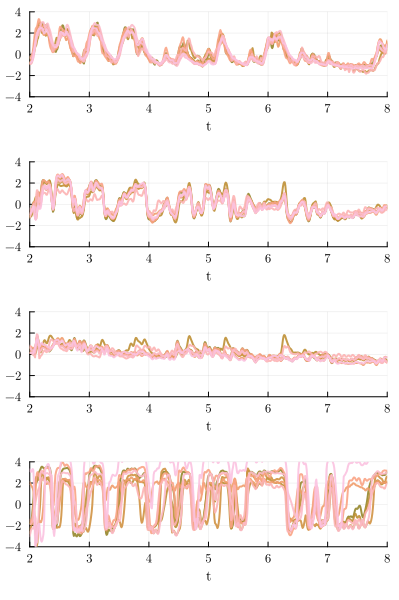

"figures/simulations/EJ_Syn_tests/AVA_EJ_Syn_2023-01-23-15.pdf"

In [25]:
t_id_st = 201  # time to start plot
t_id_end = 801
##############################################
#### plot the same thing again and save  #####
##############################################
clrs = palette(:batlow25)
#clrs = clrs[[1,4,7,10,13]]  ## AVB clr set ##
clrs = clrs[[14,16,17,19, 20, 22,23,24]]  ## AVA clr set ##


p1 = plot(time_vec[t_id_st:t_id_end], Dintrinsic[1,t_id_st:t_id_end], linewidth = 2, color = clrs[1], alpha = 0.9,
    xlabel = "t", ylim = (-4,4), # ylim = (-2, 3.5)
    xlim = (time_vec[t_id_st], time_vec[t_id_end]), labels = false) #labels = intrinsic_neurons[1], labels = false, ylim = (-2.5,3)

for i in collect(2:Nintrinsic)
p1 = plot!(time_vec[t_id_st:t_id_end], Dintrinsic[i,t_id_st:t_id_end], linewidth = 2, color = clrs[i], alpha = 0.9,
        labels = false, legend=:topleft) 
    #labels = intrinsic_neurons[i], labels = false
end
#title = "data"
labels = reshape(intrinsic_neurons,(1,:)) #ylim = (-1.5,3.5)



#p2 = plot(title = " ",ytick = -2:1:2, xlim = (time_vec[t_id_st],time_vec[num_steps]), ylim = (-3,3.5))
p2 = plot(sol_EJ_Syn, idxs = (1), color = clrs[1], linewidth = 2, labels = false, alpha = 0.9,
    ylim = (-4,4), xlim = (time_vec[t_id_st], time_vec[t_id_end])) #ylim = (-2.5,3)
for i in collect(2:Nintrinsic)
p2 = plot!(sol_EJ_Syn, idxs = (i), color = clrs[i], linewidth = 2,alpha = 0.9,
     labels = false, xlim = (time_vec[t_id_st], time_vec[t_id_end])) 
end


p3 = plot(sol_EJ, idxs = (1), color = clrs[1], linewidth = 2, labels = false, alpha = 0.9, ylim = (-4,4),
    xlim = (time_vec[t_id_st], time_vec[t_id_end])) #ylim = (-2.5,3)
for i in collect(2:Nintrinsic)
p3 = plot!(sol_EJ, idxs = (i), color = clrs[i], linewidth = 2,alpha = 0.9,
     labels = false, xlim = (time_vec[t_id_st], time_vec[t_id_end])) 
end

p4 = plot(sol_Syn, idxs = (1), color = clrs[1], linewidth = 2, labels = false, alpha = 0.9, ylim = (-4,4),
    xlim = (time_vec[t_id_st], time_vec[t_id_end]))
for i in collect(2:Nintrinsic)
p4 = plot!(sol_Syn, idxs = (i), color = clrs[i], linewidth = 2,alpha = 0.9,
     labels = false, xlim = (time_vec[t_id_st], time_vec[t_id_end])) 
end

pall = plot(p1, p2,p3,p4,layout = (4,1), size = (400,600))

display(pall)


## name of saved simulation figure ##
#name = string("AVB_EJ_Syn_labels_", date_string, ".pdf")  # date_string comes from dataset pulled
#name = string("AVB_EJ_Syn_", date_string, ".pdf")  # date_string comes from dataset pulled

#name = string("AVA_EJ_Syn_labels_", date_string, ".pdf")  # date_string comes from dataset pulled
name = string("AVA_EJ_Syn_", date_string, ".pdf")  # date_string comes from dataset pulled

path = "figures/simulations/EJ_Syn_tests/"
path_and_name = string(path, name)
#savefig(pall,path_and_name) # behav ts plot




In [26]:
intrinsic_neurons

8-element Vector{String7}:
 "AVEL"
 "AIBL"
 "RIMR"
 "AVAR"
 "AVER"
 "AIBR"
 "RIML"
 "AVAL"

## core neurons simulation with random input (no longer random) and heaviside from key neurons

Bookmark intrinsic_neuron_pulse <a name ='intrinsic_neuron_pulse' />

# heat pulse

In [27]:

####################################
#########  2023-01-05-01  ##########
####################################

fn = "2023-01-05-01.json"  # heat fig

Atanas_heat_neurons_ADA = ["ADAL"]

Atanas_heat_neurons_pos = ["AWBL", "AWCL"]
Atanas_heat_neurons_neg = ["OLQDL","OLQDR", "OLLL", "OLLR"]

Atanas_all_pert_neurons = vcat(Atanas_heat_neurons_ADA,Atanas_heat_neurons_pos,Atanas_heat_neurons_neg)

####################################
#########  2023-01-09-22  ##########
####################################

#fn = "2023-01-09-22.json"   # heat fig
# Atanas_heat_neurons_pos = ["ADAL", "AWBL", "AWCL", "AWCR"]
# Atanas_heat_neurons_neg = ["AIMR", "OLQDL", "OLLL", "OLLR", "AIYL", "AIYR"]



#fn = "2023-01-10-07.json"  # heat fig
date_string =fn[1:13]
################################

data_folder = "data/Atanas_data"
filepath1 = joinpath(joinpath(dir_one_up, data_folder), fn); # make sure and change this!
Fdata1 = JSON.parsefile(filepath1)
labs = Fdata1["labeled"]
Fts1 = Fdata1["trace_array"]
dt = round(Fdata1["avg_timestep"]; digits = 3)
dFts1dt = copy(0*Fts1)

#####################################
## point where heat is turned on ####
#####################################
## will give error, no events found if no heat ##
heat_pt = Fdata1["events"]["heat"][1]


#########################
####  smooth data  ######
#########################
for i in collect(1:size(Fts1)[1])
    ts_tmp = savitzky_golay(Fts1[i], 11, 5).y;
    #ts_tmp = savitzky_golay(Fts1[i], 21, 7).y;
    ts_tmp_chop1 = ts_tmp[3:end]
    ts_tmp_chop2 = ts_tmp[1:end-2]
    dts_dt_tmp = (ts_tmp_chop1 - ts_tmp_chop2)/(2*dt)
    ts_tmp_mid = ts_tmp[2:end-1]
    Fts1[i] = ts_tmp_mid
    dFts1dt[i] = dts_dt_tmp
end
key_set = keys(labs)
Dict_nms = Dict{String,Int}()
for ky in key_set
    Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
end
names_have = keys(Dict_nms);
ts_len = size(Fts1[1])[1]

#########################################################################################################
### Go though list of model neurons, see what model neurons there are timeseries for and collect ts #####
#########################################################################################################
ts_myneuros = zeros(N,ts_len)
dtsdt_myneuros = zeros(N,ts_len)

##################
##################

i = 1 # counter
for nm in final_neurons
    if nm in(names_have)
        ts_myneuros[i,:] = Fts1[Dict_nms[nm]]  
        dtsdt_myneuros[i,:] = dFts1dt[Dict_nms[nm]]      
    ###############################
    ## ADD in DATA REPLACEMENT ##
    ##############################
    else
        #Data_Replacement(nm)
        Data_Replacement(i, nm, names_have, switchout_list, Dict_nms, ts_myneuros, dtsdt_myneuros, Fts1, dFts1dt)
    end
    i+=1 # move on to the next row
end


##########################
## Pre for regression ####
##########################
D = copy(ts_myneuros)  # timeseries of all neurons in order of "final_neurons" (many rows zero, no data for them)
dDdt = copy(dtsdt_myneuros)  # derivative timeseries

##########################
#### get short D matrix ##
##########################
row_sum = sum(D, dims = 2)
idxfull_list = Int64[]
for i in collect(1:size(row_sum)[1])
    if row_sum[i] != 0
        append!(idxfull_list, i)  # get index of nonzero rows (aka final_neurons that have a timeseries)
    end  
end

Dshort = D[idxfull_list,:] # only the rows with nonzero timeseries
dDdtshort = dDdt[idxfull_list,:]  # only the rows with nonzero timeseries

println("num neurons ts = ", size(idxfull_list)[1]) # number of final_neurons that have a timeseries

##################################################
## get submatrices with only core (ts) neurons ###
##################################################
EJ_mat_short = EJ_mat[idxfull_list,idxfull_list]
S_mat_short = S_mat[idxfull_list,idxfull_list]
N_short = size(idxfull_list)[1]

#########################################################
## core neurons - named and timeseries - short block ####
#########################################################
core_neurons = final_neurons[idxfull_list]  # core neurons are all neurons with ts for current dataset
Ncore = size(core_neurons)[1]
ids_core = []
for i in collect(1:Ncore)
    append!(ids_core, final_neuron_dict[core_neurons[i]])
end
Dcore = D[ids_core,:]
dDdtcore = dDdt[ids_core,:]
core_neurons_dict = Dict(zip(core_neurons, collect(1:Ncore)));

##################################
## put in regressed Syn signs ####
##################################
S_approx = A_10takes_avg # use the average for 30 datasets
d_approx = d_10takes_avg; # use the average for 30 datasets


switchout ASGR
ASGL
switchout SMBDL
switchout AVBR
AVBR isn't here and doesn't have twin
switchout RIBR
RIBL
switchout AVKR
switchout URADR
switchout URADL
switchout AVKL
switchout SMBVL
switchout SMBVR
switchout BAGL
switchout AWAR
AWAL
switchout AVBL
AVBL isn't here and doesn't have twin
switchout SMBDR
switchout BAGR
num neurons ts = 72


In [28]:
#####################################
####   Triangle pulse function   ####
#####################################

heaviside(x) = x < 0 ? 0.0 : 1.0

function tri_pulse(n, n_pulse, Amp, n_decay)
    x = n - n_pulse
    out = heaviside(x)*heaviside(-1*(x-n_decay))*(Amp - (Amp/n_decay)*x)
    return out
end

tri_pulse (generic function with 1 method)

In [29]:
######################
####  PARAMETERS  ####
######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2    #  a = -2
γ = 1.4   #  γ = 1.4  
β = 10    #  β = 10 
τ = 0.2   #  τ = 0.1

####### OLD set, produces figures in current draft ######
# a = -10  # a = -2
# γ = 7     # γ = 1.4  
# β = 50    # β = 10 
# τ = 1


d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]

######################
######################

##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)

############################
#####  complete set  #######
############################
intrinsic_neurons = ["AVBL","AVBR","RIBL","RIBR","RID", "AVDL", "AVDR",
    "AVAL", "AVAR", "RIML", "RIMR",
"AVEL","AVER","AIBL","AIBR"]

clrsp = palette(:batlow10)
clrs = [clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[5], clrsp[5],
    clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8]]

ids_intrinsic = []
for i in collect(1:size(intrinsic_neurons)[1])
    append!(ids_intrinsic,core_neurons_dict[intrinsic_neurons[i]])
end
Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]

##########
#########
### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]
Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

##### Heat time ####
heat_time = dt*(heat_pt-tstart)
####################

num_steps =  1609-1 # 1400 
t_short = dt*collect(0:num_steps)


# ########################
# ### heaviside pulse  ###
# ########################

steps_vec = collect(1:num_steps+1)
Amp = 4
dur_short = 50
dur_long = 200

#######
#######

# ASH_ts = (tri_pulse.(steps_vec, 300, Amp, 50) + tri_pulse.(steps_vec, 400, Amp, 50) + tri_pulse.(steps_vec, 500, Amp, 50)
#         + tri_pulse.(steps_vec, 600, Amp, 50) + tri_pulse.(steps_vec, 700, Amp, 50) 
#         + tri_pulse.(steps_vec, 900, Amp, 50) + tri_pulse.(steps_vec, 1000, Amp, 50) + tri_pulse.(steps_vec, 1100, Amp, 50)
#         + tri_pulse.(steps_vec, 1200, Amp, 50) + tri_pulse.(steps_vec, 1300, Amp, 50));


ASH_ts_odd = (tri_pulse.(steps_vec, 300, Amp, dur_short) + tri_pulse.(steps_vec, 500, Amp, dur_short) + tri_pulse.(steps_vec, 700, Amp, dur_short) 
        + tri_pulse.(steps_vec, 900, Amp, dur_short) + tri_pulse.(steps_vec, 1100, Amp, dur_short)
        + tri_pulse.(steps_vec, 1300, Amp, dur_short));

ASH_ts_odd_long = (tri_pulse.(steps_vec, 300, Amp, dur_long) + tri_pulse.(steps_vec, 500, Amp, dur_long) + tri_pulse.(steps_vec, 700, Amp, dur_long) 
        + tri_pulse.(steps_vec, 900, Amp, dur_long) + tri_pulse.(steps_vec, 1100, Amp, dur_long)
        + tri_pulse.(steps_vec, 1300, Amp, dur_long));


ASH_ts_odd_special = tri_pulse.(steps_vec, 500, Amp, dur_short);
ASH_ts_odd_long_special = tri_pulse.(steps_vec, 500, Amp, dur_long);

#####################################
### GET TRANSITION INDEX ???? #######
#####################################
transition_indices_odd = findall(i -> ASH_ts_odd[i] == 0 && ASH_ts_odd[i+1] > 0, 1:length(ASH_ts_odd)-1)



################################
###### do perturbations  #######
################################

id_pos_vec = []
id_neg_vec = []


for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd_long_special # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd_special # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_odd_special  # add negative perturbation
end



####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

tspan = (0.0,t_short[end])  # timespan for the ode

#######################################
## both synaptic and EJ connections ###
#######################################

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn = solve(prob,Tsit5(), saveat=t_short);


In [30]:
## Need new colors for the pos and neg signal neurons


#red_blue = palette(:roma10)
#red_blue = reverse(palette(:vik10))
red_blue = palette(:RdBu_11)


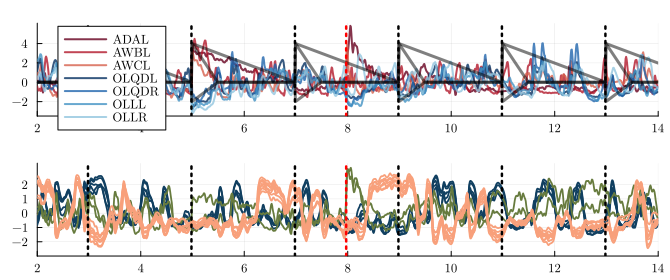

"figures/simulations/heat_stim/sim_heat_pert_2023-01-05-01.pdf"

In [31]:
################################################
## plot results of simulation versus data  #####
################################################

t_id_st = 201  # time to start plot


##### Get locations of beginning of pulse  #####
transition_indices = findall(i -> ASH_ts_odd[i] == 0 && ASH_ts_odd[i+1] > 0, 1:length(ASH_ts_odd)-1)
t_stamps_pulse = time_vec[transition_indices]

########################
#### plot simulation ######
########################
p2 = plot(title = " ",ytick = -2:1:2, xlim = (time_vec[t_id_st],14), ylim = (-3,3.5))
for i in collect(1:Nintrinsic)
    #plot!(sol_EJ_Syn.t,sol_EJ_Syn[i,:], label = false, color = clrs[i], linewidth = 1.8)
plot!(sol_EJ_Syn.t[t_id_st:end], sol_EJ_Syn[i,t_id_st:end], label = false, color = clrs[i], linewidth = 1.8)
end

p2 = vline!([heat_time], color = :red, linestyle = :dot, linewidth = 2.5, label = :none)
p2 = vline!(t_stamps_pulse, color = :black, linestyle = :dot, linewidth = 2.5, label = :none)

#####################################
#### plot signal perturbation ts ####
#####################################

p3 = plot(title = " ",ytick = -4:2:4, xlim = (time_vec[t_id_st],14))  #ylim = (-3,3.5)

ct = 1
for id in id_pos_vec
    p3 = plot!(time_vec[t_id_st:num_steps+1],Dsignals[id,t_id_st:num_steps+1], color = red_blue[ct], alpha =0.8, label = Atanas_all_pert_neurons[ct])
    ct = ct+1
end

ct2 = 0
for id in id_neg_vec
    p3 = plot!(time_vec[t_id_st:num_steps+1],Dsignals[id,t_id_st:num_steps+1], color = red_blue[end-ct2], alpha = 0.8, label = Atanas_all_pert_neurons[ct])
    ct2 = ct2+1
    ct = ct+1
end


p3 = plot!(time_vec[t_id_st:num_steps+1],ASH_ts_odd[t_id_st:num_steps+1], color = :black, linewidth = 3, alpha = 0.5)
p3 = plot!(time_vec[t_id_st:num_steps+1],ASH_ts_odd_long[t_id_st:num_steps+1], color = :black, linewidth = 3, alpha = 0.5)
p3 = plot!(time_vec[t_id_st:num_steps+1],-0.5*ASH_ts_odd[t_id_st:num_steps+1], color = :black, linewidth = 3, alpha = 0.5)
p3 = vline!([heat_time], color = :red, linestyle = :dot, linewidth = 2.5, label = :none)
p3 = vline!(t_stamps_pulse, color = :black, linestyle = :dot, linewidth = 2.5, label = :none)


p3 = plot!(size = (670,200))

######################################################
### Behavioral timeseries of data and simulation #####
######################################################

F_data_ts = mean(Dintrinsic[1:5,1:num_steps+1],dims = 1)
R_data_ts = mean(Dintrinsic[8:13,1:num_steps+1],dims = 1)

thresh = 0.5

z_data_ts = F_data_ts - R_data_ts
z_data_ts[z_data_ts.> thresh] .= 1
z_data_ts[z_data_ts.< -thresh] .= -1
z_data_ts[(z_data_ts .> -thresh).*(z_data_ts .< thresh)] .=0
behav_ts = sign.(z_data_ts)


F_sim_ts = mean(sol_EJ_Syn[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0
behav_ts_sim = sign.(z_sim_ts)
######################################################
######################################################


######################################################
####  save simulation !!!!!!  ####
######################################################

# name = string("sim_", date_string, ".pdf")  # date_string comes from dataset pulled
# path = "figures/simulations/"
# path_and_name = string(path, name)

pall = plot(p3,p2, layout = (2,1), size = (670,280))  #size = (470,300)  #size = (470,330) # size = (700,330), #size = (700,300)

display(pall)
# savefig(pall, path_and_name) # ava plot

############################################################################
####  save MAIN timeseries  (higher order stats based on this)   ####
##########################################################################

name = string("sim_heat_pert_", date_string, ".pdf")  # date_string comes from dataset pulled
#name = string("sim_no_pert_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/heat_stim/"
path_and_name = string(path, name)
#savefig(pall,path_and_name) # behav ts plot


# Figure 8

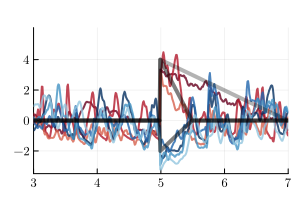

"figures/simulations/heat_stim/"

In [32]:
#####################################
#### plot signal perturbation ts ####
#####################################

#p3 = plot(title = " ",ytick = -4:2:4, xlim = (6.95,11))  #ylim = (-3,3.5)
p3 = plot(title = " ",ytick = -4:2:4, xlim = (3.0,7.0))  #ylim = (-3,3.5)

ct = 1
for id in id_pos_vec
    p3 = plot!(time_vec[t_id_st:num_steps+1],Dsignals[id,t_id_st:num_steps+1], color = red_blue[ct], alpha =0.8, label = Atanas_all_pert_neurons[ct])
    ct = ct+1
end

ct2 = 0
for id in id_neg_vec
    p3 = plot!(time_vec[t_id_st:num_steps+1],Dsignals[id,t_id_st:num_steps+1], color = red_blue[end-ct2], alpha = 0.8, label = Atanas_all_pert_neurons[ct])
    ct2 = ct2+1
    ct = ct+1
end

p3 = plot!(time_vec[t_id_st:num_steps+1],ASH_ts_odd_special[t_id_st:num_steps+1], color = :black, linewidth = 4, alpha = 0.5)
p3 = plot!(time_vec[t_id_st:num_steps+1],ASH_ts_odd_long_special[t_id_st:num_steps+1], color = :black, linewidth = 4, alpha = 0.3)
p3 = plot!(time_vec[t_id_st:num_steps+1],-0.5*ASH_ts_odd_special[t_id_st:num_steps+1], color = :black, linewidth = 4, alpha = 0.5)
p3 = vline!([heat_time], color = :red, linestyle = :dot, linewidth = 2.5, label = :none)
p3 = vline!([8.0], color = :red, linestyle = :dot, linewidth = 2.5, label = :none)
#p3 = vline!(t_stamps_pulse, color = :black, linestyle = :dot, linewidth = 2.5, label = :none)


p3 = plot!(legend = false, size = (300,200)) # size = (350,200)
display(p3)

###########################################
#########     save snippet     ############
###########################################

name = string("sim_heat_pert_snippet_", date_string, ".pdf")  # date_string comes from dataset pulled
#name = string("sim_no_pert_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/heat_stim/"
#path_and_name = string(path, name)
#savefig(p3,path_and_name) # behav ts plot

## Plot the perturbation then then signal with perturbation

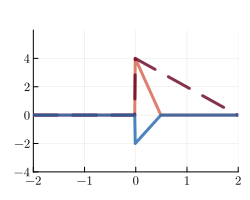

"figures/simulations/heat_stim/pert_snippet_2023-01-05-01.pdf"

In [33]:
#####################################
####  plot perturbation  ##########
#####################################

p3 = plot(title = " ",ytick = -4:2:5, ylim = (-4,6), xlim = (-2,2))  #ylim = (-3,3.5)

p3 = plot!(time_vec[t_id_st:num_steps+1].-5,ASH_ts_odd_special[t_id_st:num_steps+1], color = red_blue[3], linewidth = 3, alpha = 0.8)
p3 = plot!(time_vec[t_id_st:num_steps+1].-5,ASH_ts_odd_long_special[t_id_st:num_steps+1], color = red_blue[1], linewidth = 3, alpha = 0.8, linestyle = :dash)
p3 = plot!(time_vec[t_id_st:num_steps+1].-5,-0.5*ASH_ts_odd_special[t_id_st:num_steps+1], color = red_blue[10], linewidth = 3, alpha = 0.8)

#p3 = vline!([t_stamps_pulse[2].-5], color = :red, linestyle = :dot, linewidth = 3, label = :none)


p3 = plot!(legend = false, size = (250,200)) # size = (350,200)
display(p3)

###########################################
#########     save snippet     ############
###########################################

name = string("pert_snippet_", date_string, ".pdf")  # date_string comes from dataset pulled
#name = string("sim_no_pert_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/heat_stim/"
path_and_name = string(path, name)
#savefig(p3,path_and_name) # behav ts plot

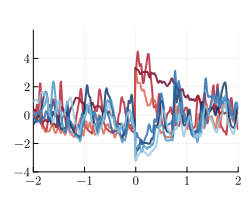

"figures/simulations/heat_stim/sig_snippet_2023-01-05-01.pdf"

In [34]:
#####################################
####  plot signal neurons  ##########
#####################################

p3 = plot(title = " ",ytick = -4:2:4, ylim = (-4,6), xlim = (-2,2))  #ylim = (-3,3.5)

ct = 1
for id in id_pos_vec
    p3 = plot!(time_vec[t_id_st:num_steps+1].-5,Dsignals[id,t_id_st:num_steps+1], color = red_blue[ct], alpha =0.8, label = Atanas_all_pert_neurons[ct])
    ct = ct+1
end

ct2 = 0
for id in id_neg_vec
    p3 = plot!(time_vec[t_id_st:num_steps+1].-5,Dsignals[id,t_id_st:num_steps+1], color = red_blue[end-ct2], alpha = 0.8, label = Atanas_all_pert_neurons[ct])
    ct2 = ct2+1
    ct = ct+1
end

#p3 = vline!(t_stamps_pulse, color = :black, linestyle = :dot, linewidth = 2.5, label = :none)

#p3 = vline!([t_stamps_pulse[2].-5], color = :red, linestyle = :dot, linewidth = 3, label = :none)


p3 = plot!(legend = false, size = (250,200)) # size = (350,200)
display(p3)

###########################################
#########     save snippet     ############
###########################################

name = string("sig_snippet_", date_string, ".pdf")  # date_string comes from dataset pulled
#name = string("sim_no_pert_", date_string, ".pdf")  # date_string comes from dataset pulled
path = "figures/simulations/heat_stim/"
path_and_name = string(path, name)
#savefig(p3,path_and_name) # behav ts plot

## Run multiple trials, take stats of percentage of C. elegans in reversal before and after heat stimulus

In [35]:
num_steps =  1609-1 # 1400 
t_short = dt*collect(0:num_steps)


# ########################
# ### heaviside pulse  ###
# ########################

steps_vec = collect(1:num_steps+1)
Amp = 4. # 3
dur_short = 50
dur_long = 200

ASH_ts_odd = (tri_pulse.(steps_vec, 300, Amp, dur_short) + tri_pulse.(steps_vec, 500, Amp, dur_short) + tri_pulse.(steps_vec, 700, Amp, dur_short) 
        + tri_pulse.(steps_vec, 900, Amp, dur_short) + tri_pulse.(steps_vec, 1100, Amp, dur_short)
        + tri_pulse.(steps_vec, 1300, Amp, dur_short));

ASH_ts_even = (tri_pulse.(steps_vec, 200, Amp, dur_short) + tri_pulse.(steps_vec, 400, Amp, dur_short) + tri_pulse.(steps_vec, 600, Amp, dur_short) 
        + tri_pulse.(steps_vec, 1000, Amp, dur_short) 
        + tri_pulse.(steps_vec, 1200, Amp, dur_short));

ASH_ts_odd2 = (tri_pulse.(steps_vec, 350, Amp, dur_short) + tri_pulse.(steps_vec, 550, Amp, dur_short) + tri_pulse.(steps_vec, 750, Amp, dur_short) 
        + tri_pulse.(steps_vec, 950, Amp, dur_short) + tri_pulse.(steps_vec, 1150, Amp, dur_short)
        + tri_pulse.(steps_vec, 1350, Amp, dur_short));

ASH_ts_even2 = (tri_pulse.(steps_vec, 250, Amp, dur_short) + tri_pulse.(steps_vec, 450, Amp, dur_short) + tri_pulse.(steps_vec, 650, Amp, dur_short) 
        + tri_pulse.(steps_vec, 1050, Amp, dur_short) 
        + tri_pulse.(steps_vec, 1250, Amp, dur_short) );
        

######  long durations #######
ASH_ts_odd_long = (tri_pulse.(steps_vec, 300, Amp, dur_long) + tri_pulse.(steps_vec, 500, Amp, dur_long) + tri_pulse.(steps_vec, 700, Amp, dur_long) 
        + tri_pulse.(steps_vec, 900, Amp, dur_long) + tri_pulse.(steps_vec, 1100, Amp, dur_long)
        + tri_pulse.(steps_vec, 1300, Amp, dur_long));

ASH_ts_even_long = (tri_pulse.(steps_vec, 200, Amp, dur_long) + tri_pulse.(steps_vec, 400, Amp, dur_long) + tri_pulse.(steps_vec, 600, Amp, dur_long) 
        + tri_pulse.(steps_vec, 1000, Amp, dur_long) 
        + tri_pulse.(steps_vec, 1200, Amp, dur_long));

ASH_ts_odd2_long = (tri_pulse.(steps_vec, 350, Amp, dur_long) + tri_pulse.(steps_vec, 550, Amp, dur_long) + tri_pulse.(steps_vec, 750, Amp, dur_long) 
        + tri_pulse.(steps_vec, 950, Amp, dur_long) + tri_pulse.(steps_vec, 1150, Amp, dur_long)
        + tri_pulse.(steps_vec, 1350, Amp, dur_long));

ASH_ts_even2_long = (tri_pulse.(steps_vec, 250, Amp, dur_long) + tri_pulse.(steps_vec, 450, Amp, dur_long) + tri_pulse.(steps_vec, 650, Amp, dur_long) 
        + tri_pulse.(steps_vec, 1050, Amp, dur_long) 
        + tri_pulse.(steps_vec, 1250, Amp, dur_long) );




#####################################
### GET TRANSITION INDEX ???? #######
#####################################
transition_indices_odd = findall(i -> ASH_ts_odd[i] == 0 && ASH_ts_odd[i+1] > 0, 1:length(ASH_ts_odd)-1)
transition_indices_even = findall(i -> ASH_ts_even[i] == 0 && ASH_ts_even[i+1] > 0, 1:length(ASH_ts_even)-1)

transition_indices_odd2 = findall(i -> ASH_ts_odd2[i] == 0 && ASH_ts_odd2[i+1] > 0, 1:length(ASH_ts_odd2)-1)
transition_indices_even2 = findall(i -> ASH_ts_even2[i] == 0 && ASH_ts_even2[i+1] > 0, 1:length(ASH_ts_even2)-1)




5-element Vector{Int64}:
  249
  449
  649
 1049
 1249

## Dataset 2023-01-09-22

In [36]:
#####  main dataset  ########
#fn = "2023-01-23-15.json"  


#fn = "2023-01-05-01.json"  # heat fig
fn = "2023-01-09-22.json"   # heat fig


#fn = "2023-01-10-07.json"  # heat fig
date_string =fn[1:13]
################################

data_folder = "data/Atanas_data"
filepath1 = joinpath(joinpath(dir_one_up, data_folder), fn); # make sure and change this!
Fdata1 = JSON.parsefile(filepath1)
labs = Fdata1["labeled"]
Fts1 = Fdata1["trace_array"]
dt = round(Fdata1["avg_timestep"]; digits = 3)
dFts1dt = copy(0*Fts1)

#####################################
## point where heat is turned on ####
#####################################
## will give error, no events found if no heat ##
#heat_pt = Fdata1["events"]["heat"][1]


#########################
####  smooth data  ######
#########################
for i in collect(1:size(Fts1)[1])
    ts_tmp = savitzky_golay(Fts1[i], 11, 5).y;
    #ts_tmp = savitzky_golay(Fts1[i], 21, 7).y;
    ts_tmp_chop1 = ts_tmp[3:end]
    ts_tmp_chop2 = ts_tmp[1:end-2]
    dts_dt_tmp = (ts_tmp_chop1 - ts_tmp_chop2)/(2*dt)
    ts_tmp_mid = ts_tmp[2:end-1]
    Fts1[i] = ts_tmp_mid
    dFts1dt[i] = dts_dt_tmp
end
key_set = keys(labs)
Dict_nms = Dict{String,Int}()
for ky in key_set
    Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
end
names_have = keys(Dict_nms);
ts_len = size(Fts1[1])[1]

#########################################################################################################
### Go though list of model neurons, see what model neurons there are timeseries for and collect ts #####
#########################################################################################################
ts_myneuros = zeros(N,ts_len)
dtsdt_myneuros = zeros(N,ts_len)

##################
##################

i = 1 # counter
for nm in final_neurons
    if nm in(names_have)
        ts_myneuros[i,:] = Fts1[Dict_nms[nm]]  
        dtsdt_myneuros[i,:] = dFts1dt[Dict_nms[nm]]      
    ###############################
    ## ADD in DATA REPLACEMENT ##
    ##############################
    else
        #Data_Replacement(nm)
        Data_Replacement(i, nm, names_have, switchout_list, Dict_nms, ts_myneuros, dtsdt_myneuros, Fts1, dFts1dt)
    end
    i+=1 # move on to the next row
end


##########################
## Pre for regression ####
##########################
D = copy(ts_myneuros)  # timeseries of all neurons in order of "final_neurons" (many rows zero, no data for them)
dDdt = copy(dtsdt_myneuros)  # derivative timeseries

##########################
#### get short D matrix ##
##########################
row_sum = sum(D, dims = 2)
idxfull_list = Int64[]
for i in collect(1:size(row_sum)[1])
    if row_sum[i] != 0
        append!(idxfull_list, i)  # get index of nonzero rows (aka final_neurons that have a timeseries)
    end  
end

Dshort = D[idxfull_list,:] # only the rows with nonzero timeseries
dDdtshort = dDdt[idxfull_list,:]  # only the rows with nonzero timeseries

println("num neurons ts = ", size(idxfull_list)[1]) # number of final_neurons that have a timeseries

##################################################
## get submatrices with only core (ts) neurons ###
##################################################
EJ_mat_short = EJ_mat[idxfull_list,idxfull_list]
S_mat_short = S_mat[idxfull_list,idxfull_list]
N_short = size(idxfull_list)[1]

#########################################################
## core neurons - named and timeseries - short block ####
#########################################################
core_neurons = final_neurons[idxfull_list]  # core neurons are all neurons with ts for current dataset
Ncore = size(core_neurons)[1]
ids_core = []
for i in collect(1:Ncore)
    append!(ids_core, final_neuron_dict[core_neurons[i]])
end
Dcore = D[ids_core,:]
dDdtcore = dDdt[ids_core,:]
core_neurons_dict = Dict(zip(core_neurons, collect(1:Ncore)));

##################################
## put in regressed Syn signs ####
##################################
S_approx = A_10takes_avg # use the average for 30 datasets
d_approx = d_10takes_avg; # use the average for 30 datasets


switchout SMBDL
switchout AVBR
AVBR isn't here and doesn't have twin
switchout RIBR
RIBL
switchout AWAL
switchout URADR
switchout URADL
switchout AVKL
AVKR
switchout SMBVL
switchout SMBVR
switchout AWAR
switchout AVBL
AVBL isn't here and doesn't have twin
switchout SMBDR
switchout RIML
RIMR
switchout BAGR
BAGL
num neurons ts = 88


In [37]:

######################
####  PARAMETERS  ####
######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2    #  a = -2
γ = 1.4   #  γ = 1.4  
β = 10    #  β = 10 
τ = 0.2   #  τ = 0.1


d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]

######################
######################

##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)

############################
#####  complete set  #######
############################
intrinsic_neurons = ["AVBL","AVBR","RIBL","RIBR","RID", "AVDL", "AVDR",
    "AVAL", "AVAR", "RIML", "RIMR",
"AVEL","AVER","AIBL","AIBR"]

clrsp = palette(:batlow10)
clrs = [clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[5], clrsp[5],
    clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8]]

ids_intrinsic = []
for i in collect(1:size(intrinsic_neurons)[1])
    append!(ids_intrinsic,core_neurons_dict[intrinsic_neurons[i]])
end
Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]

##########
#########
### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]
Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

##### Heat time ####
heat_time = dt*(heat_pt-tstart)
####################



####################################
#########  2023-01-09-22  ##########
####################################

Atanas_heat_neurons_ADA = ["ADAL"]
Atanas_heat_neurons_pos = ["AWBL", "AWCL", "AWCR"]
Atanas_heat_neurons_neg = ["AIMR", "OLQDL", "OLLL", "OLLR", "AIYL", "AIYR"]


####################################
###### do odd perturbations  #######
####################################

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)
    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_odd  # add negative perturbation
end


####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

tspan = (0.0,t_short[end])  # timespan for the ode

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_odd = solve(prob,Tsit5(), saveat=t_short);


#######################################
####  NOW do even perturbations  ######
#######################################

Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_even  # add negative perturbation
end



#####  get interpolations for the signal timeseries  ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_even = solve(prob,Tsit5(), saveat=t_short);



#######################################
####  NOW do odd 2  ######
#######################################

Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd2_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd2 # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_odd2  # add negative perturbation
end



#####  get interpolations for the signal timeseries  ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_odd2 = solve(prob,Tsit5(), saveat=t_short);


#######################################
####  NOW do even2  ######
#######################################

Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even2_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even2 # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_even2  # add negative perturbation
end



#####  get interpolations for the signal timeseries  ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_even2 = solve(prob,Tsit5(), saveat=t_short);



######################################################
### Behavioral timeseries of data and simulation #####
######################################################

####   ODD  ######
thresh = 0.5
F_sim_ts = mean(sol_EJ_Syn_odd[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_odd[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_odd = z_sim_ts


####   EVEN  ######
F_sim_ts = mean(sol_EJ_Syn_even[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_even[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_even = z_sim_ts


####   ODD 2  ######
F_sim_ts = mean(sol_EJ_Syn_odd2[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_odd2[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_odd2 = z_sim_ts


####   EVEN 2  ######
F_sim_ts = mean(sol_EJ_Syn_even2[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_even2[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_even2 = z_sim_ts

####################################
###  GET behavioral ts   ???? ######
####################################

behav_ts_sim_odd_0922 = sign.(z_sim_ts_odd)
behav_ts_sim_even_0922 = sign.(z_sim_ts_even)
behav_ts_sim_odd2_0922 = sign.(z_sim_ts_odd2)
behav_ts_sim_even2_0922 = sign.(z_sim_ts_even2)

##############
##############


1×1609 Matrix{Float64}:
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Dataset 2023-01-05-01

In [38]:
#####  main dataset  ########

fn = "2023-01-05-01.json"  # heat fig

date_string =fn[1:13]
################################

data_folder = "data/Atanas_data"
filepath1 = joinpath(joinpath(dir_one_up, data_folder), fn); # make sure and change this!
Fdata1 = JSON.parsefile(filepath1)
labs = Fdata1["labeled"]
Fts1 = Fdata1["trace_array"]
dt = round(Fdata1["avg_timestep"]; digits = 3)
dFts1dt = copy(0*Fts1)

#####################################
## point where heat is turned on ####
#####################################
## will give error, no events found if no heat ##
#heat_pt = Fdata1["events"]["heat"][1]


#########################
####  smooth data  ######
#########################
for i in collect(1:size(Fts1)[1])
    ts_tmp = savitzky_golay(Fts1[i], 11, 5).y;
    #ts_tmp = savitzky_golay(Fts1[i], 21, 7).y;
    ts_tmp_chop1 = ts_tmp[3:end]
    ts_tmp_chop2 = ts_tmp[1:end-2]
    dts_dt_tmp = (ts_tmp_chop1 - ts_tmp_chop2)/(2*dt)
    ts_tmp_mid = ts_tmp[2:end-1]
    Fts1[i] = ts_tmp_mid
    dFts1dt[i] = dts_dt_tmp
end
key_set = keys(labs)
Dict_nms = Dict{String,Int}()
for ky in key_set
    Dict_nms[labs[ky]["label"]] = parse(Int64, ky)       
end
names_have = keys(Dict_nms);
ts_len = size(Fts1[1])[1]

#########################################################################################################
### Go though list of model neurons, see what model neurons there are timeseries for and collect ts #####
#########################################################################################################
ts_myneuros = zeros(N,ts_len)
dtsdt_myneuros = zeros(N,ts_len)

##################
##################

i = 1 # counter
for nm in final_neurons
    if nm in(names_have)
        ts_myneuros[i,:] = Fts1[Dict_nms[nm]]  
        dtsdt_myneuros[i,:] = dFts1dt[Dict_nms[nm]]      
    ###############################
    ## ADD in DATA REPLACEMENT ##
    ##############################
    else
        #Data_Replacement(nm)
        Data_Replacement(i, nm, names_have, switchout_list, Dict_nms, ts_myneuros, dtsdt_myneuros, Fts1, dFts1dt)
    end
    i+=1 # move on to the next row
end


##########################
## Pre for regression ####
##########################
D = copy(ts_myneuros)  # timeseries of all neurons in order of "final_neurons" (many rows zero, no data for them)
dDdt = copy(dtsdt_myneuros)  # derivative timeseries

##########################
#### get short D matrix ##
##########################
row_sum = sum(D, dims = 2)
idxfull_list = Int64[]
for i in collect(1:size(row_sum)[1])
    if row_sum[i] != 0
        append!(idxfull_list, i)  # get index of nonzero rows (aka final_neurons that have a timeseries)
    end  
end

Dshort = D[idxfull_list,:] # only the rows with nonzero timeseries
dDdtshort = dDdt[idxfull_list,:]  # only the rows with nonzero timeseries

println("num neurons ts = ", size(idxfull_list)[1]) # number of final_neurons that have a timeseries

##################################################
## get submatrices with only core (ts) neurons ###
##################################################
EJ_mat_short = EJ_mat[idxfull_list,idxfull_list]
S_mat_short = S_mat[idxfull_list,idxfull_list]
N_short = size(idxfull_list)[1]

#########################################################
## core neurons - named and timeseries - short block ####
#########################################################
core_neurons = final_neurons[idxfull_list]  # core neurons are all neurons with ts for current dataset
Ncore = size(core_neurons)[1]
ids_core = []
for i in collect(1:Ncore)
    append!(ids_core, final_neuron_dict[core_neurons[i]])
end
Dcore = D[ids_core,:]
dDdtcore = dDdt[ids_core,:]
core_neurons_dict = Dict(zip(core_neurons, collect(1:Ncore)));

##################################
## put in regressed Syn signs ####
##################################
S_approx = A_10takes_avg # use the average for 30 datasets
d_approx = d_10takes_avg; # use the average for 30 datasets


switchout ASGR
ASGL
switchout SMBDL
switchout AVBR
AVBR isn't here and doesn't have twin
switchout RIBR
RIBL
switchout AVKR
switchout URADR
switchout URADL
switchout AVKL
switchout SMBVL
switchout SMBVR
switchout BAGL
switchout AWAR
AWAL
switchout AVBL
AVBL isn't here and doesn't have twin
switchout SMBDR
switchout BAGR
num neurons ts = 72


In [39]:

######################
####  PARAMETERS  ####
######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2    #  a = -2
γ = 1.4   #  γ = 1.4  
β = 10    #  β = 10 
τ = 0.2   #  τ = 0.1


d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]

######################
######################

##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)

############################
#####  complete set  #######
############################

ids_intrinsic = []
for i in collect(1:size(intrinsic_neurons)[1])
    append!(ids_intrinsic,core_neurons_dict[intrinsic_neurons[i]])
end
Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]

##########
#########
### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]
Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

##### Heat time ####
heat_time = dt*(heat_pt-tstart)
####################


####################################
#########  2023-01-05-01  ##########
####################################

Atanas_heat_neurons_ADA = ["ADAL"]

Atanas_heat_neurons_pos = ["AWBL", "AWCL"]
Atanas_heat_neurons_neg = ["OLQDL","OLQDR", "OLLL", "OLLR"]


####################################
###### do odd perturbations  #######
####################################

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_odd  # add negative perturbation
end


####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

tspan = (0.0,t_short[end])  # timespan for the ode

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_odd = solve(prob,Tsit5(), saveat=t_short);


#######################################
####  NOW do even perturbations  ######
#######################################

Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_even  # add negative perturbation
end



#####  get interpolations for the signal timeseries  ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_even = solve(prob,Tsit5(), saveat=t_short);



#######################################
####  NOW do odd 2  ######
#######################################

Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

id_pos_vec = []
id_neg_vec = []

for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd2_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_odd2 # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_odd2  # add negative perturbation
end



#####  get interpolations for the signal timeseries  ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

##  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_odd2 = solve(prob,Tsit5(), saveat=t_short);


#######################################
####  NOW do even2  ######
#######################################

Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition

id_pos_vec = []
id_neg_vec = []


for nm in Atanas_heat_neurons_ADA
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even2_long # add positive perturbation
end

for nm in Atanas_heat_neurons_pos
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_pos_vec = push!(id_pos_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] + ASH_ts_even2 # add positive perturbation
end


for nm in Atanas_heat_neurons_neg
    id_tmp =  core_neurons_dict[nm]
    id_final = indexin(id_tmp,ids_signal)  # find core neuron id in signal id list -> this is the new index
    id_neg_vec = push!(id_neg_vec, id_final)

    Dsignals[id_final,:] = Dsignals[id_final,:] - 0.5*ASH_ts_even2  # add negative perturbation
end



#####  get interpolations for the signal timeseries  ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

###  sim  ###

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)

sol_EJ_Syn_even2 = solve(prob,Tsit5(), saveat=t_short);



######################################################
### Behavioral timeseries of data and simulation #####
######################################################

####   ODD  ######
thresh = 0.5
F_sim_ts = mean(sol_EJ_Syn_odd[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_odd[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_odd = z_sim_ts


####   EVEN  ######
F_sim_ts = mean(sol_EJ_Syn_even[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_even[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_even = z_sim_ts


####   ODD 2  ######
F_sim_ts = mean(sol_EJ_Syn_odd2[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_odd2[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_odd2 = z_sim_ts


####   EVEN 2  ######
F_sim_ts = mean(sol_EJ_Syn_even2[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn_even2[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0

z_sim_ts_even2 = z_sim_ts

####################################
###  GET behavioral ts   ???? ######
####################################

behav_ts_sim_odd_0501 = sign.(z_sim_ts_odd)
behav_ts_sim_even_0501 = sign.(z_sim_ts_even)
behav_ts_sim_odd2_0501 = sign.(z_sim_ts_odd2)
behav_ts_sim_even2_0501 = sign.(z_sim_ts_even2)

##############
##############


1×1609 Matrix{Float64}:
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  …  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0

## Behavioral timeseries

In [40]:
#################################################
###    get behavior before and after pulse  #####
#################################################


###   need  ######
# transition_indices

# behav_ts_sim_odd_0501
# behav_ts_sim_even_0501
# behav_ts_sim_odd_0922
# behav_ts_sim_even_0922


# behav_ts_sim_odd2_0501
# behav_ts_sim_even2_0501
# behav_ts_sim_odd2_0922
# behav_ts_sim_even2_0922


behav_pre_post_heat = []

###########################
#####  dataset 0501  ######
###########################

for idx in transition_indices_odd
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_odd_0501[idx-100:idx+100])
end

for idx in transition_indices_even
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_even_0501[idx-100:idx+100])
end


for idx in transition_indices_odd2
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_odd2_0501[idx-100:idx+100])
end


for idx in transition_indices_even2
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_even2_0501[idx-100:idx+100])
end


###########################
#####  dataset 0922  ######
###########################

for idx in transition_indices_odd
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_odd_0922[idx-100:idx+100])
end

for idx in transition_indices_even
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_even_0922[idx-100:idx+100])
end


for idx in transition_indices_odd2
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_odd2_0922[idx-100:idx+100])
end


for idx in transition_indices_even2
    println(idx)
    push!(behav_pre_post_heat, behav_ts_sim_even2_0922[idx-100:idx+100])
end


299
499
699
899
1099
1299
199
399
599
999
1199
349
549
749
949
1149
1349
249
449
649
1049
1249
299
499
699
899
1099
1299
199
399
599
999
1199
349
549
749
949
1149
1349
249
449
649
1049
1249


## collect all pre-post into a mat and computer fraction reversing

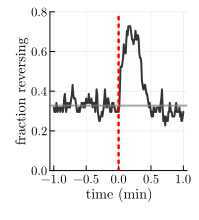

"figures/simulations/heat_stim/frac_reverse.pdf"

In [41]:

behav_mat = reduce(hcat, behav_pre_post_heat)
fraction_reversing = vec(mean(behav_mat .== -1, dims = 2))
avg_before_heat = mean(fraction_reversing[1:98])

p1 = plot(dt*collect(-100:100),fraction_reversing, color = :black, alpha = 0.8)

p1 = vline!([0], color = :red, linestyle = :dot, linewidth = 2.5, label = :none)

p1 = hline!([avg_before_heat], color = :grey, linewidth = 2, label = :none, alpha = 0.7)

# title = "fraction reversing pre/post stimulus"
p1 = plot!(xlabel = "time (min)", ylabel = "fraction reversing", ylim = (0,0.8), size = (200,220)) #size = (350,250)

display(p1)

name = string("frac_reverse", ".pdf")  
path = "figures/simulations/heat_stim/"
path_and_name = string(path, name)

#savefig(p1, path_and_name) # behav ts plot


In [42]:
mean(fraction_reversing[1:98])

0.32745825602968465

############################

###############
##############

In [43]:
#######################
###   PARAMETERS   ####
#######################
## fps at 0, 0.4, 0.8
fp1 = -0.8
fp2 = 0.1
fp3 = 1.0

a = -2    #  a = -2
γ = 1.4   #  γ = 1.4  
β = 10    #  β = 10 
τ = 0.2   #  τ = 0.1

d = d_approx[ids_core]
A = S_approx[ids_core,ids_core] 
W = EJ_mat[ids_core,ids_core]

######################
######################

##########################
## feed in signals #######
##########################
time_vec = collect(0:dt:100)


############################
#####  complete set  #######
############################
intrinsic_neurons = ["AVBL","AVBR","RIBL","RIBR","RID", "AVDL", "AVDR",
    "AVAL", "AVAR", "RIML", "RIMR",
"AVEL","AVER","AIBL","AIBR"]

clrsp = palette(:batlow10)
clrs = [clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[2], clrsp[5], clrsp[5],
    clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8], clrsp[8]]


ids_intrinsic = []
id_new_order = []
for i in collect(1:Ncore)
    if core_neurons[i] in(intrinsic_neurons)
        append!(ids_intrinsic,i)
        id_tmp = findall(x->x==core_neurons[i],intrinsic_neurons)[1]
        append!(id_new_order,id_tmp)
    end   
end
clrs_new_order = clrs[id_new_order]


Nintrinsic = size(ids_intrinsic)[1]
ids_signal = setdiff(collect(1:Ncore), ids_intrinsic) # signal neurons ids
Nsignals = size(ids_signal)[1]
intrinsic_neurons = core_neurons[ids_intrinsic] # get the new order for intrinsic neurons


### Get signals ###
tstart = 5  #tstart = 5, 100, 600, 900
Dcore = D[ids_core,:]
Dcore_cut = Dcore[:,tstart:end]
Dsignals = Dcore_cut[ids_signal,:]
Dintrinsic =Dcore_cut[ids_intrinsic,:]
u0 = Dintrinsic[:,1] # initial condition



##########
num_steps = 1400 
t_short = dt*collect(0:num_steps)

Dsignals=Dsignals[:,1:num_steps+1]


# ########################
# ### heaviside pulse  ###
# ########################
#ASH_ts = 1*heaviside_pulse.(collect(1:num_steps+1), num_steps/2, 2); # OLQ #ASE 7 # AWC 3 # ASH 7

ASH_ts = 1*heaviside_pulse.(collect(1:num_steps+1), 100, 2)- heaviside_pulse.(collect(1:num_steps+1), 110, 2); 


####################################
#########  2023-01-05-01  ##########
####################################

id1_pos = core_neurons_dict["ADAL"]
#id2_pos = core_neurons_dict["AVDL"]   #  AVDL is not a signal neuron so leave this one out
#id3_pos = core_neurons_dict["AVDR"]   #  AVDL is not a signal neuron so leave this one out
id4_pos = core_neurons_dict["AWBL"]
id5_pos = core_neurons_dict["AWCL"]

id1_pos = indexin(id1_pos,ids_signal)  # find core neuron id in signal id list -> this is the new index
#id2_pos = indexin(id2_pos,ids_signal)  # find core neuron id in signal id list -> this is the new index
#id3_pos = indexin(id3_pos,ids_signal)
id4_pos = indexin(id4_pos,ids_signal)
id5_pos = indexin(id5_pos,ids_signal)



id1_neg = core_neurons_dict["OLQDL"]
id2_neg = core_neurons_dict["OLQDR"]
id3_neg = core_neurons_dict["OLLL"]
id4_neg = core_neurons_dict["OLLR"]

id1_neg = indexin(id1_neg,ids_signal)  # find core neuron id in signal id list -> this is the new index
id2_neg = indexin(id2_neg,ids_signal)  # find core neuron id in signal id list -> this is the new index
id3_neg = indexin(id3_neg,ids_signal)
id4_neg = indexin(id4_neg,ids_signal)

####################################
#########  2023-01-09-15  ##########
####################################
# id1 = core_neurons_dict["OLQVR"]
# id2 = core_neurons_dict["OLQVL"]
# id3 = core_neurons_dict["OLQDL"]
# id4 = core_neurons_dict["OLQDR"]

# id1 = core_neurons_dict["ASEL"]
# id2 = core_neurons_dict["ASER"]

####################################
#########  2023-01-09-22  ##########
####################################

#id1 = core_neurons_dict["ASHL"]
#id1 = core_neurons_dict["AWCL"]
#id2 = core_neurons_dict["AWCR"]


# id1 = indexin(id1,ids_signal)  # find core neuron id in signal id list -> this is the new index
# id2 = indexin(id2,ids_signal)  # find core neuron id in signal id list -> this is the new index
# id3 = indexin(id3,ids_signal)
# id4 = indexin(id4,ids_signal)

## save real signals
#ASHL_real_ts = Dsignals[id1,:]
# AWCL_real_ts = Dsignals[id1,:]
# AWCR_real_ts = Dsignals[id2,:]

# ASEL_real_ts = Dsignals[id1,:]
# ASER_real_ts = Dsignals[id2,:]

# OLQVR_real_ts = Dsignals[id1,:]
# OLQVL_real_ts = Dsignals[id2,:]
# OLQDL_real_ts = Dsignals[id3,:]
# OLQDR_real_ts = Dsignals[id4,:]

# Dsignals[id1,:] = ASH_ts # put the heaviside in the signal matrix
# Dsignals[id2,:] = ASH_ts # put the heaviside in the signal matrix
# Dsignals[id3,:] = ASH_ts
# Dsignals[id4,:] = ASH_ts



# Dsignals[id1_pos,:] = Dsignals[id1_pos,:] + ASH_ts # put the heaviside in the signal matrix
# #Dsignals[id2_pos,:] = Dsignals[id2_pos,:] + ASH_ts # put the heaviside in the signal matrix
# #Dsignals[id3_pos,:] = Dsignals[id3_pos,:] + ASH_ts
# Dsignals[id4_pos,:] = Dsignals[id4_pos,:] + ASH_ts
# Dsignals[id5_pos,:] = Dsignals[id5_pos,:] + ASH_ts


# Dsignals[id1_neg,:] = Dsignals[id1_neg,:] - ASH_ts # put the heaviside in the signal matrix
# Dsignals[id2_neg,:] = Dsignals[id2_neg,:] - ASH_ts # put the heaviside in the signal matrix
# Dsignals[id3_neg,:] = Dsignals[id3_neg,:] - ASH_ts
# Dsignals[id4_neg,:] = Dsignals[id4_neg,:] - ASH_ts



####### get interpolations for the signal timeseries ####
Dsigs_interp = []
for i in 1:Nsignals
    itp = LinearInterpolation(Dsignals[i,1:num_steps+1], t_short)
    push!(Dsigs_interp, itp)
end

tspan = (0.0,t_short[end])  # timespan for the ode
##########

#######################################
## both synaptic and EJ connections ###
#######################################

p = (γ, β, τ)
prob = ODEProblem(lorenz!,u0,tspan, p)
sol_EJ_Syn = solve(prob,Tsit5(), saveat=t_short);



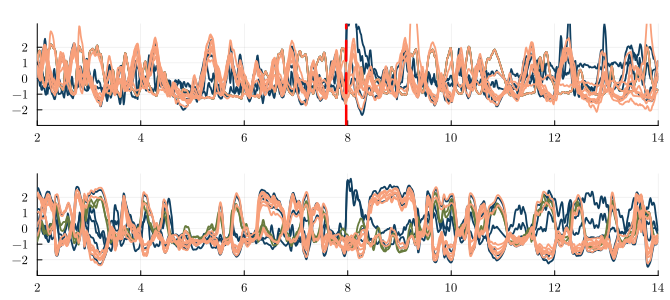

In [44]:
################################################
## plot results of simulation versus data  #####
################################################

t_id_st = 201  # time to start plot
########################
#### plot real TS ######
########################
p1 = plot(title = " ",ytick = -2:1:2, xlim = (time_vec[t_id_st],14), ylim = (-3,3.5))
for i in 1:size(Dintrinsic,1)
    plot!(time_vec[t_id_st:num_steps+1], Dintrinsic[i,t_id_st:num_steps+1], label = false, color = clrs[i], linewidth = 1.8) #label = intrinsic_neurons[i]
end

p1 = vline!([heat_time], color = :red, linestyle = :dash, linewidth = 2.5, label = :none)

########################
#### plot simulation ######
########################
p2 = plot(title = " ",ytick = -2:1:2, xlim = (time_vec[t_id_st],14), ylim = (-3,3.5))
for i in collect(1:Nintrinsic)
    #plot!(sol_EJ_Syn.t,sol_EJ_Syn[i,:], label = false, color = clrs[i], linewidth = 1.8)
plot!(sol_EJ_Syn.t[t_id_st:end], sol_EJ_Syn[i,t_id_st:end], label = false, color = clrs[i], linewidth = 1.8)
end

######################################################
### Behavioral timeseries of data and simulation #####
######################################################

F_data_ts = mean(Dintrinsic[1:5,1:num_steps+1],dims = 1)
R_data_ts = mean(Dintrinsic[8:13,1:num_steps+1],dims = 1)

thresh = 0.5

z_data_ts = F_data_ts - R_data_ts
z_data_ts[z_data_ts.> thresh] .= 1
z_data_ts[z_data_ts.< -thresh] .= -1
z_data_ts[(z_data_ts .> -thresh).*(z_data_ts .< thresh)] .=0
behav_ts = sign.(z_data_ts)


F_sim_ts = mean(sol_EJ_Syn[1:5,1:num_steps+1],dims = 1) 
R_sim_ts = mean(sol_EJ_Syn[8:13,1:num_steps+1],dims = 1)
z_sim_ts = F_sim_ts - R_sim_ts
z_sim_ts[z_sim_ts .> thresh] .= 1
z_sim_ts[z_sim_ts .< -thresh] .= -1
z_sim_ts[(z_sim_ts .> -thresh).*(z_sim_ts .< thresh)] .=0
behav_ts_sim = sign.(z_sim_ts)
######################################################
######################################################


######################################################
####  save simulation !!!!!!  ####
######################################################

# name = string("sim_", date_string, ".pdf")  # date_string comes from dataset pulled
# path = "figures/simulations/"
# path_and_name = string(path, name)

pall = plot(p1,p2, layout = (2,1), size = (670,300))  #size = (470,300)  #size = (470,330) # size = (700,330), #size = (700,300)

display(pall)

In [45]:
#######################################
## both synaptic and EJ connections ###
#######################################
id_AVAL = findall(intrinsic_neurons.=="AVAL")[1]
id_AVAR = findall(intrinsic_neurons.=="AVAR")[1]

id_AVEL = findall(intrinsic_neurons.=="AVEL")[1]
id_AVER = findall(intrinsic_neurons.=="AVER")[1]

id_AVBL = findall(intrinsic_neurons.=="AVBL")[1]
id_AVBR = findall(intrinsic_neurons.=="AVBR")[1]
id_RIBL = findall(intrinsic_neurons.=="RIBL")[1]
id_RIBR = findall(intrinsic_neurons.=="RIBR")[1]

##################
## behav ts ######
behav_ts_sim = sign.(mean(sol_EJ_Syn[[id_AVAL, id_AVAR, id_AVEL, id_AVER],:], dims=1) - mean(sol_EJ_Syn[[id_AVBL, id_AVBR, id_RIBL, id_RIBR],:], dims=1))
behav_ts = sign.(mean(Dintrinsic[[id_AVAL, id_AVAR, id_AVEL, id_AVER],1:num_steps],dims = 1) - mean(Dintrinsic[[id_AVBL, id_AVBR, id_RIBL, id_RIBR],1:num_steps],dims = 1))

pulse_t1 = time_vec[floor(Int, num_steps/2)]

6.99